In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the dataset
data = pd.read_csv('dataset 2.csv', sep='\t')

# Quick look at the Customer Personality dataset
print("\nCustomer Personality Dataset Shape:", data.shape)
print(data.head())


Customer Personality Dataset Shape: (2240, 29)
     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  Accepte

In [ ]:
print(f"Summary Of The Dataset :")
data.describe()

Summary Of The Dataset :


ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2240.000000  ...        2240.000000   2240.000000   2240.000000   
mean         37.525446  ...           5.316518      0.072768      0.074554   
std          54.628979  ...           2.426645      0.259813      0.262728   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%           3.000000  ...           3.000000      0.000000      0.000000   
50%          12.000000  ...           6.000000      0.000000      0.000000   
75%          50.000000  ...           7.000000      0.000000      0.000000   
max         259.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
mean       0.072768      0.064286      0.013393     0.009375            3.0   
std        0.259813      0.245316      0.114976     0.096391            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2240.0  2240.000000  
mean        11.0     0.149107  
std          0.0     0.356274  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 26 columns]

In [ ]:
data.describe(include=object)

Education Marital_Status Dt_Customer
count         2240           2240        2240
unique           5              8         663
top     Graduation        Married  31-08-2012
freq          1127            864          12

In [ ]:
print(f"Null values of the Dataset :")
data.isna().sum()

Null values of the Dataset :


ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

* There are missing values in Income. We will drop the rows that have missing income values.
* Dt_Customer that indicates the date a customer joined in this dataset is not parsed as DateTime.
* We will encode the categorical features into numerical form later.

In [ ]:
data.dropna(axis = 0, inplace = True)
print(f"After dropping null values, the shape of the Dataset is {data.shape}")
print(f"After dropping null values, null values of the Dataset :")
data.isna().sum().to_frame()

After dropping null values, the shape of the Dataset is (2216, 29)
After dropping null values, null values of the Dataset :


0
ID                   0
Year_Birth           0
Education            0
Marital_Status       0
Income               0
Kidhome              0
Teenhome             0
Dt_Customer          0
Recency              0
MntWines             0
MntFruits            0
MntMeatProducts      0
MntFishProducts      0
MntSweetProducts     0
MntGoldProds         0
NumDealsPurchases    0
NumWebPurchases      0
NumCatalogPurchases  0
NumStorePurchases    0
NumWebVisitsMonth    0
AcceptedCmp3         0
AcceptedCmp4         0
AcceptedCmp5         0
AcceptedCmp1         0
AcceptedCmp2         0
Complain             0
Z_CostContact        0
Z_Revenue            0
Response             0

In [ ]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"], format='%d-%m-%Y') # Specify the format of the date string. The original format was DD-MM-YYYY which is '%d-%m-%Y'
dates = []
for i in data["Dt_Customer"]:
    i = i.date()
    dates.append(i)

print(f"Newest customer's enrolment date is {max(dates)}")
print(f"Oldest customer's enrolment date is {min(dates)}")

Newest customer's enrolment date is 2014-06-29
Oldest customer's enrolment date is 2012-07-30


In [ ]:
days = []
newest = max(dates)
for i in dates:
    duration = newest - i
    days.append(duration)
data["Customer Loyalty"] = days
data["Customer Loyalty"] = data["Customer Loyalty"].dt.days
data["Age"] = 2015 - data["Year_Birth"]
data["Spent"] = data["MntWines"] + data["MntFruits"] + data["MntMeatProducts"] + data["MntFishProducts"] + data["MntSweetProducts"] + data["MntGoldProds"]
data["Children"] = data["Kidhome"] + data["Teenhome"]
data["Parental Status"] = np.where(data["Children"] > 0, 1, 0)
data["Marital_Status"].replace({"Married":"Couple", "Together":"Couple", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone"}, inplace = True)
data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"}, inplace = True)
data["Total Promo"] =  data["AcceptedCmp1"]+ data["AcceptedCmp2"]+ data["AcceptedCmp3"]+ data["AcceptedCmp4"]+ data["AcceptedCmp5"]
data.rename(columns={"Marital_Status": "Marital Status","MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold","NumWebPurchases": "Web","NumCatalogPurchases":"Catalog","NumStorePurchases":"Store","NumDealsPurchases":"Discount Purchases"}, inplace = True)
data = data[["ID","Age","Education","Marital Status","Parental Status","Children","Kidhome","Teenhome","Income","Spent","Customer Loyalty","Recency","Wines","Fruits","Meat","Fish","Sweets","Gold","Web","Catalog","Store","Discount Purchases","Total Promo","NumWebVisitsMonth"]]

data = data[data["Age"] < 90]
data = data[data["Income"] < 600000]
print("After preprocessing, let's have a glimpse of the final dataset :")
data.head()

After preprocessing, let's have a glimpse of the final dataset :


ID  Age     Education Marital Status  Parental Status  Children  Kidhome  \
0  5524   58      Graduate          Alone                0         0        0   
1  2174   61      Graduate          Alone                1         2        1   
2  4141   50      Graduate         Couple                0         0        0   
3  6182   31      Graduate         Couple                1         1        1   
4  5324   34  Postgraduate         Couple                1         1        1   

   Teenhome   Income  Spent  ...  Meat  Fish  Sweets  Gold  Web  Catalog  \
0         0  58138.0   1617  ...   546   172      88    88    8       10   
1         1  46344.0     27  ...     6     2       1     6    1        1   
2         0  71613.0    776  ...   127   111      21    42    8        2   
3         0  26646.0     53  ...    20    10       3     5    2        0   
4         0  58293.0    422  ...   118    46      27    15    5        3   

   Store  Discount Purchases  Total Promo  NumWebVisitsMonth  
0      4                   3            0                  7  
1      2                   2            0                  5  
2     10                   1            0                  4  
3      4                   2            0                  6  
4      6                   5            0                  5  

[5 rows x 24 columns]

In [ ]:
#EDA

Let's have a look on the distribution of customer's age :


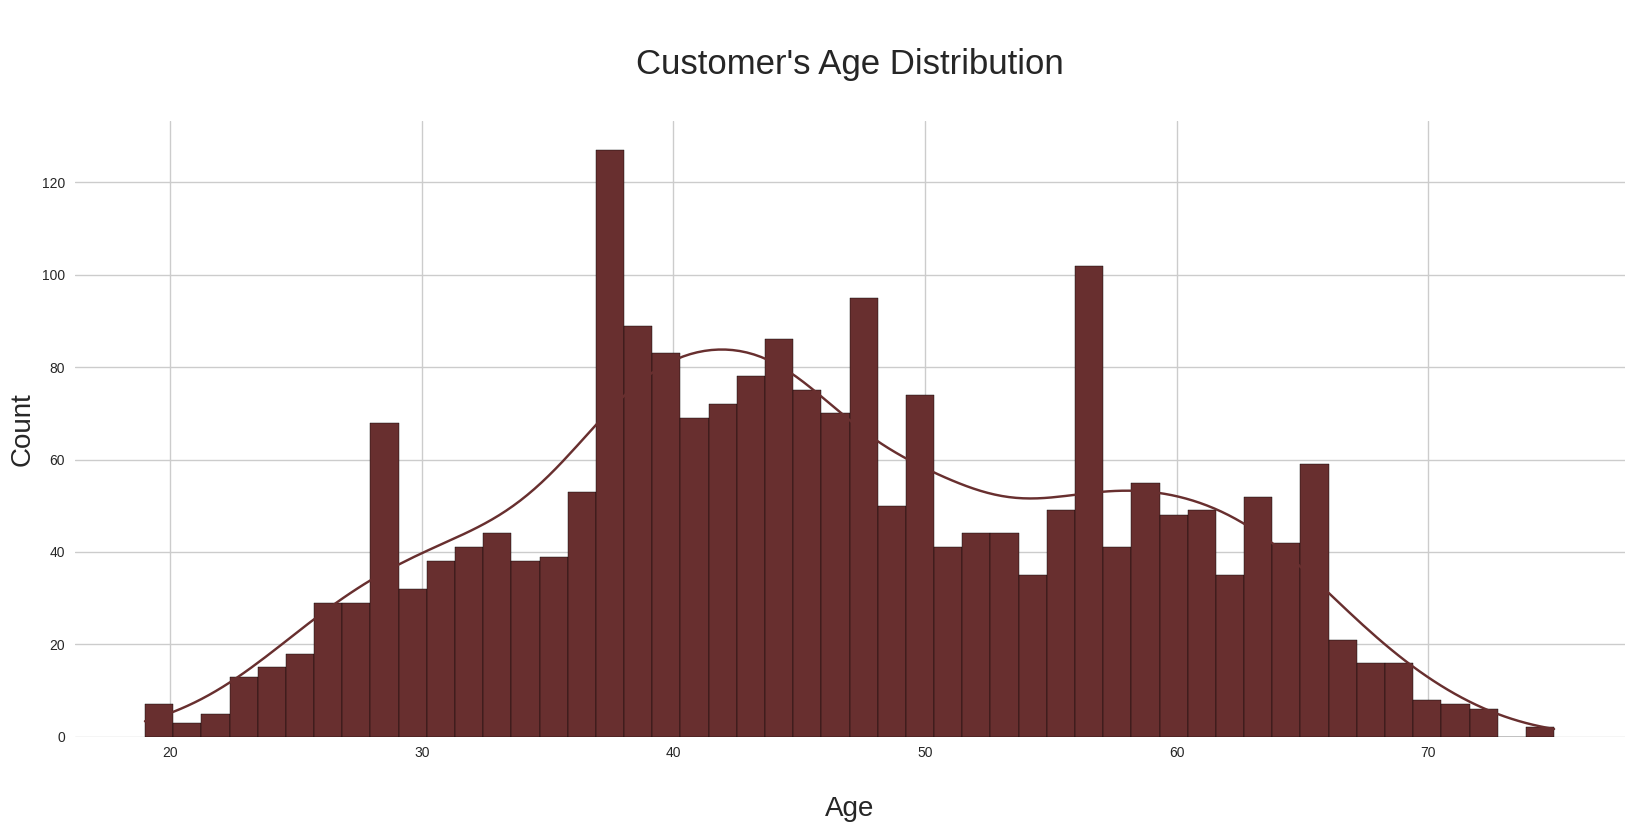

In [ ]:
# customer age distribution
print(f"Let's have a look on the distribution of customer's age :")
plt.subplots(figsize=(20, 8))
p = sns.histplot(data["Age"],color="#682F2F",kde=True,bins=50,alpha=1,fill=True,edgecolor="black")
p.axes.lines[0]
p.axes.set_title("\nCustomer's Age Distribution\n",fontsize=25)
plt.ylabel("Count",fontsize=20)
plt.xlabel("\nAge",fontsize=20)
sns.despine(left=True, bottom=True)

plt.show()

We can see it's a normal distribution of customer's age.

Most of the customers are from 36 to 50.

Let's have a look on the distribution of customer's income and spending :


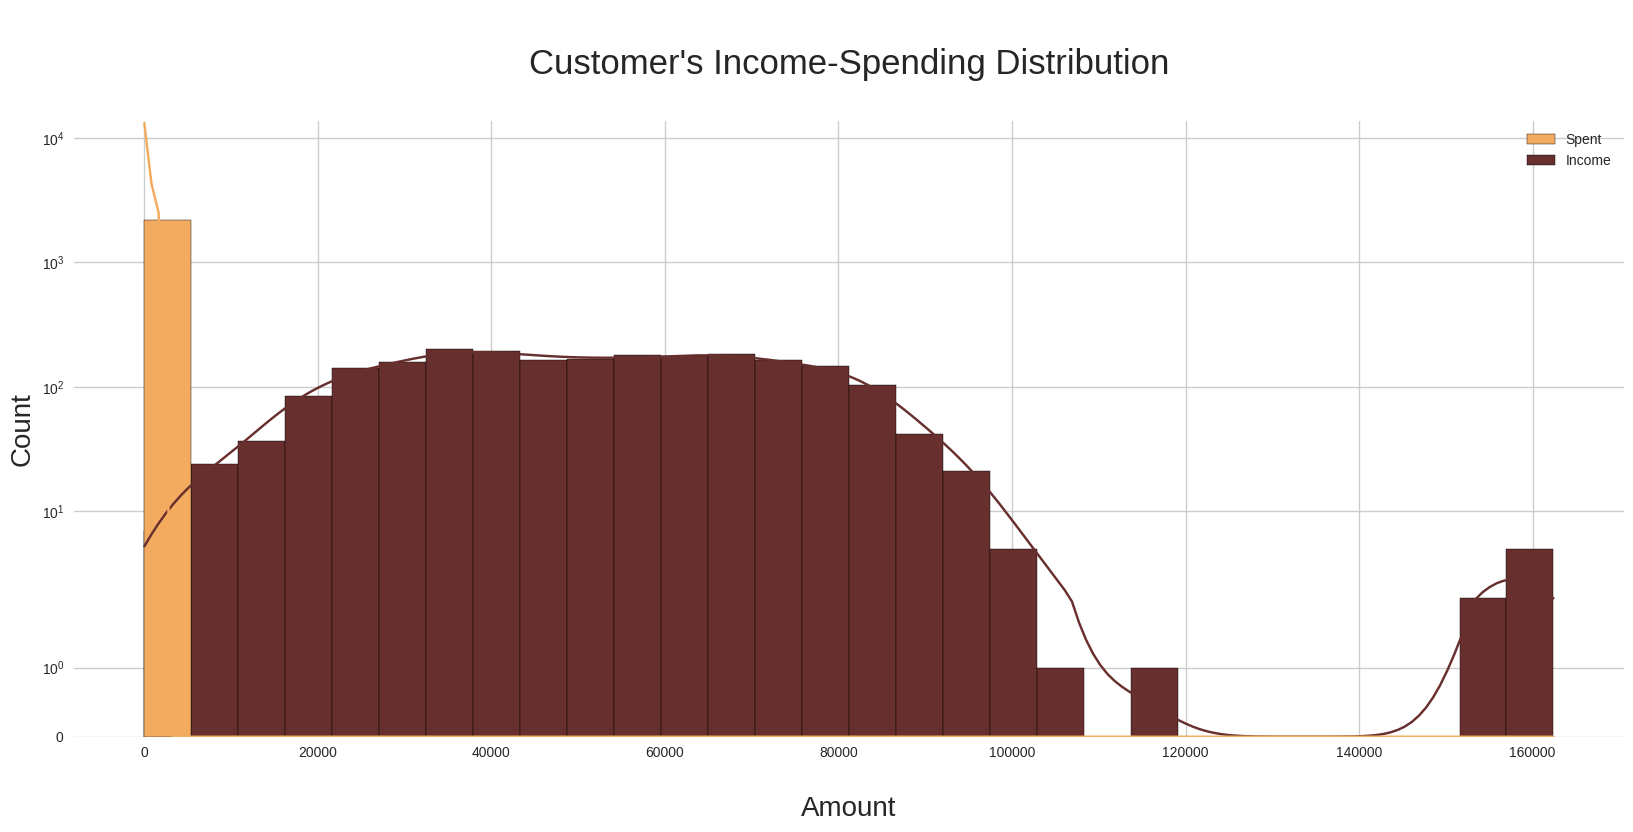

In [ ]:
print(f"Let's have a look on the distribution of customer's income and spending :")
plt.subplots(figsize=(20, 8))
p = sns.histplot(data[["Spent","Income"]],palette=["#F3AB60","#682F2F"],kde=True,bins=30,alpha=1,fill=True,edgecolor="black")
p.axes.lines[0]
p.axes.lines[1]
p.axes.set_yscale("symlog")
p.axes.set_title("\nCustomer's Income-Spending Distribution\n",fontsize=25)
plt.ylabel("Count",fontsize=20)
plt.xlabel("\nAmount",fontsize=20)
sns.despine(left=True, bottom=True)

plt.show()

Most of the customers income range is in between 20000 to 80000

Bust almost all customers spend very few portion of their income.

Let's have a look on the customer's education :


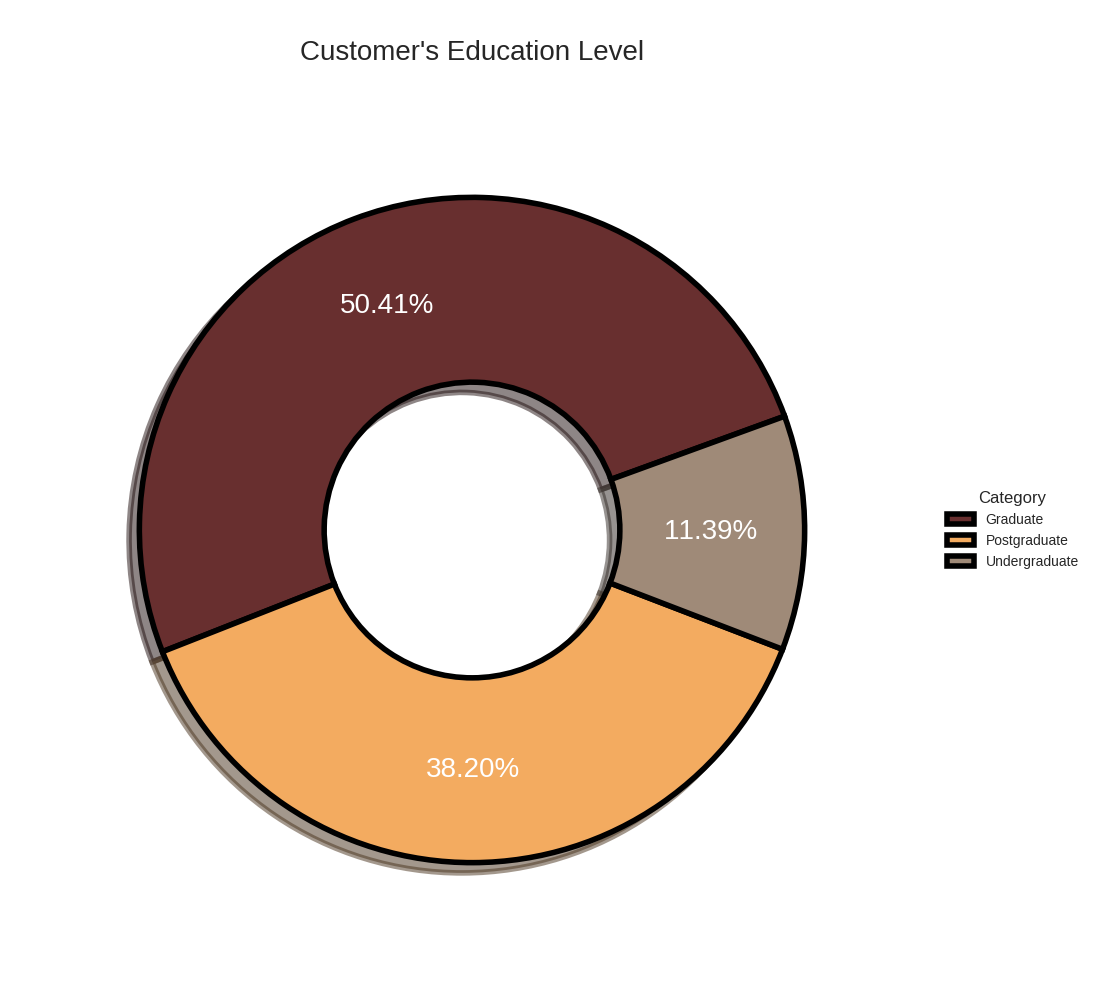

In [ ]:
print(f"Let's have a look on the customer's education :")
plt.subplots(figsize=(12, 12))

labels = "Graduate","Postgraduate","Undergraduate"
size = 0.5

wedges, texts, autotexts = plt.pie([data["Education"].value_counts()[0],
                                    data["Education"].value_counts()[1],
                                    data["Education"].value_counts()[2]],
                                    explode = (0,0,0),
                                    textprops=dict(size= 20, color= "white"),
                                    autopct="%.2f%%",
                                    pctdistance = 0.72,
                                    radius=.9,
                                    colors = ["#682F2F","#F3AB60","#9F8A78"],
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "black",
                                    linewidth = 4),
                                    startangle = 20)

plt.legend(wedges, labels, title="Category",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1), edgecolor = "black")
plt.title("\nCustomer's Education Level",fontsize=20)
plt.show()

Customers have three education levels : Undergraduate, Graduate, Postgraduate
11.39% customers are in undergraduate level, 50.41% have completed graduation and 38.2% are on postgraduation level.

Let's have a look on the distribution of customer's income and spending on basis of education level :


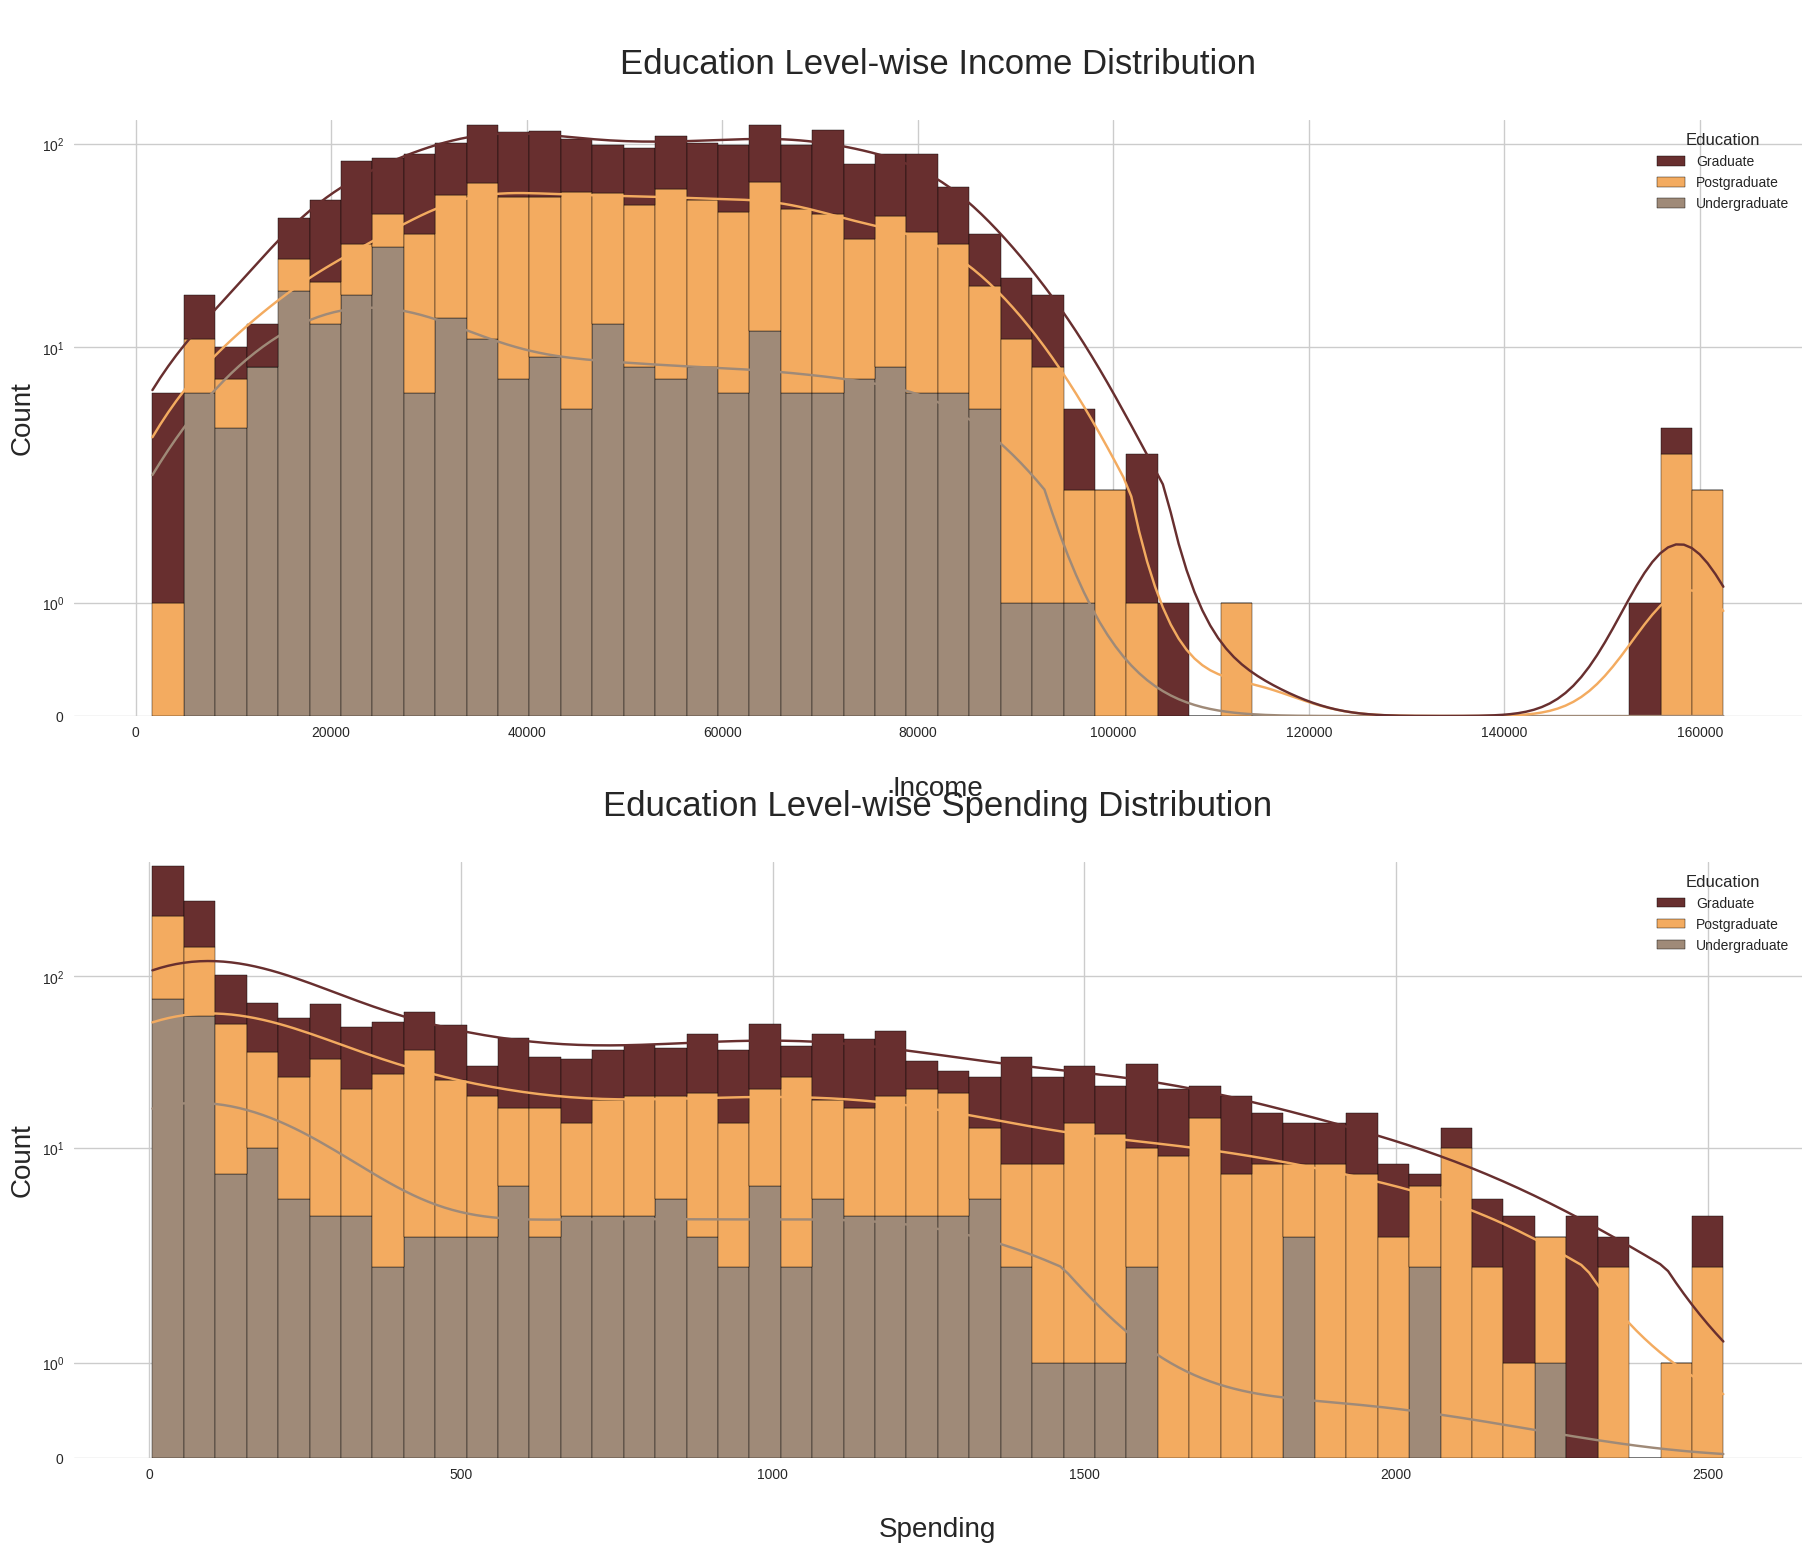

In [ ]:
print(f"Let's have a look on the distribution of customer's income and spending on basis of education level :")

_, axes = plt.subplots(2,1,figsize=(20,16),sharex=False)
plt.tight_layout(pad=7.0)

sns.histplot(data=data,x="Income",hue="Education",multiple="stack",palette=["#682F2F","#F3AB60","#9F8A78"],ax=axes[0],kde=True,bins=50,alpha=1,fill=True,edgecolor="black")
axes[0].lines[0]
axes[0].lines[1]
axes[0].lines[2]
axes[0].set_yscale("symlog")
axes[0].set_title("\nEducation Level-wise Income Distribution\n",fontsize=25)
axes[0].set_ylabel("Count",fontsize=20)
axes[0].set_xlabel("\nIncome",fontsize=20)

sns.histplot(data=data,x="Spent",hue="Education",multiple="stack",palette=["#682F2F","#F3AB60","#9F8A78"],ax=axes[1],kde=True,bins=50,alpha=1,fill=True,edgecolor="black")
axes[1].lines[0]
axes[1].lines[1]
axes[1].lines[2]
axes[1].set_yscale("symlog")
axes[1].set_title("\nEducation Level-wise Spending Distribution\n",fontsize=25)
axes[1].set_ylabel("Count",fontsize=20)
axes[1].set_xlabel("\nSpending",fontsize=20)

sns.despine(left=True, bottom=True)
plt.show()

Most of the undergraduate level customer's income range is in between 10000 to 80000 and spending in between 0 to 1400.

Most of the graduate level customer's income range is in between 20000 to 85000 and spending in between 0 to 2000.

Most of the postgraduate level customer's income range is in between 30000 to 80000 and spending in between 0 to 2000.

Let's have a look on the distribution of customer's income and spending on basis of marital and parental status :


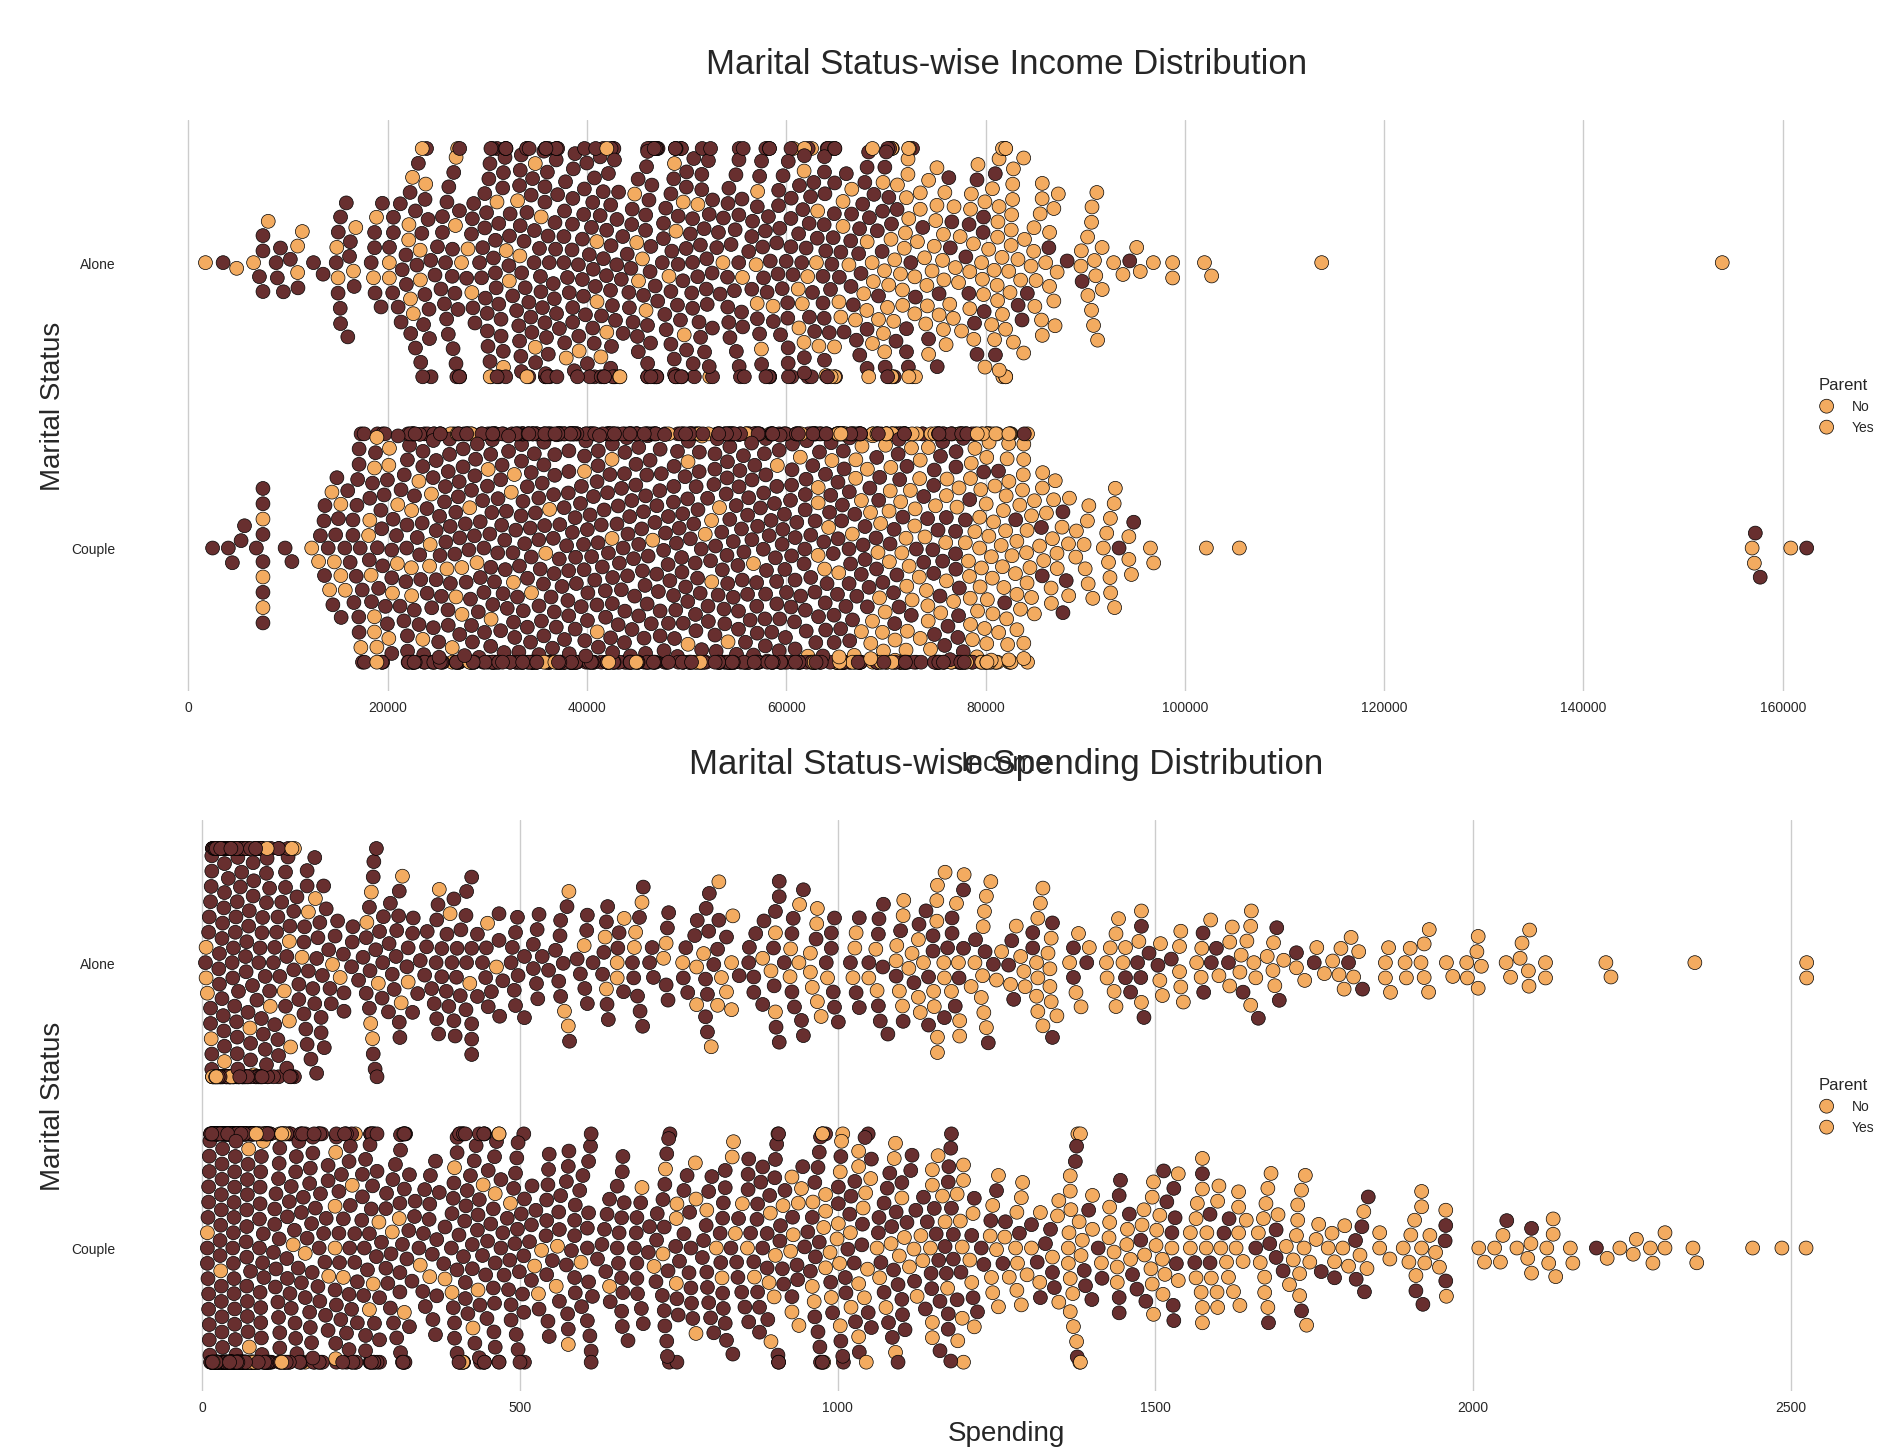

In [ ]:
print(f"Let's have a look on the distribution of customer's income and spending on basis of marital and parental status :")

_, axes = plt.subplots(2,1,figsize=(20,15),sharex=False)
plt.tight_layout(pad=6.0)

sns.swarmplot(x=data["Income"],y=data["Marital Status"],hue=data["Parental Status"],palette=["#F3AB60","#682F2F"],ax=axes[0],marker="o",size=10,alpha=1,linewidth=0.5,edgecolor="black")
axes[0].legend(["No","Yes"],title="Parent", edgecolor = "#1c1c1c",loc="center right")
axes[0].set_title("\nMarital Status-wise Income Distribution\n",fontsize=25)
axes[0].set_xlabel("\nIncome",fontsize=20)
axes[0].set_ylabel("\nMarital Status",fontsize=20)

sns.swarmplot(x=data["Spent"],y=data["Marital Status"],hue=data["Parental Status"],palette=["#F3AB60","#682F2F"],ax=axes[1],marker="o",size=10,alpha=1,linewidth=0.5,edgecolor="black")
axes[1].legend(["No","Yes"],title="Parent", edgecolor = "#1c1c1c",loc="center right")
axes[1].set_title("\nMarital Status-wise Spending Distribution\n",fontsize=25)
axes[1].set_xlabel("Spending",fontsize=20)
axes[1].set_ylabel("\nMarital Status",fontsize=20)

sns.despine(left=True, bottom=True)
plt.show()

Most of the customers live together.

Customers who live together and are parents earn much and spend much.

Let's have a look on the distribution of customer's children :


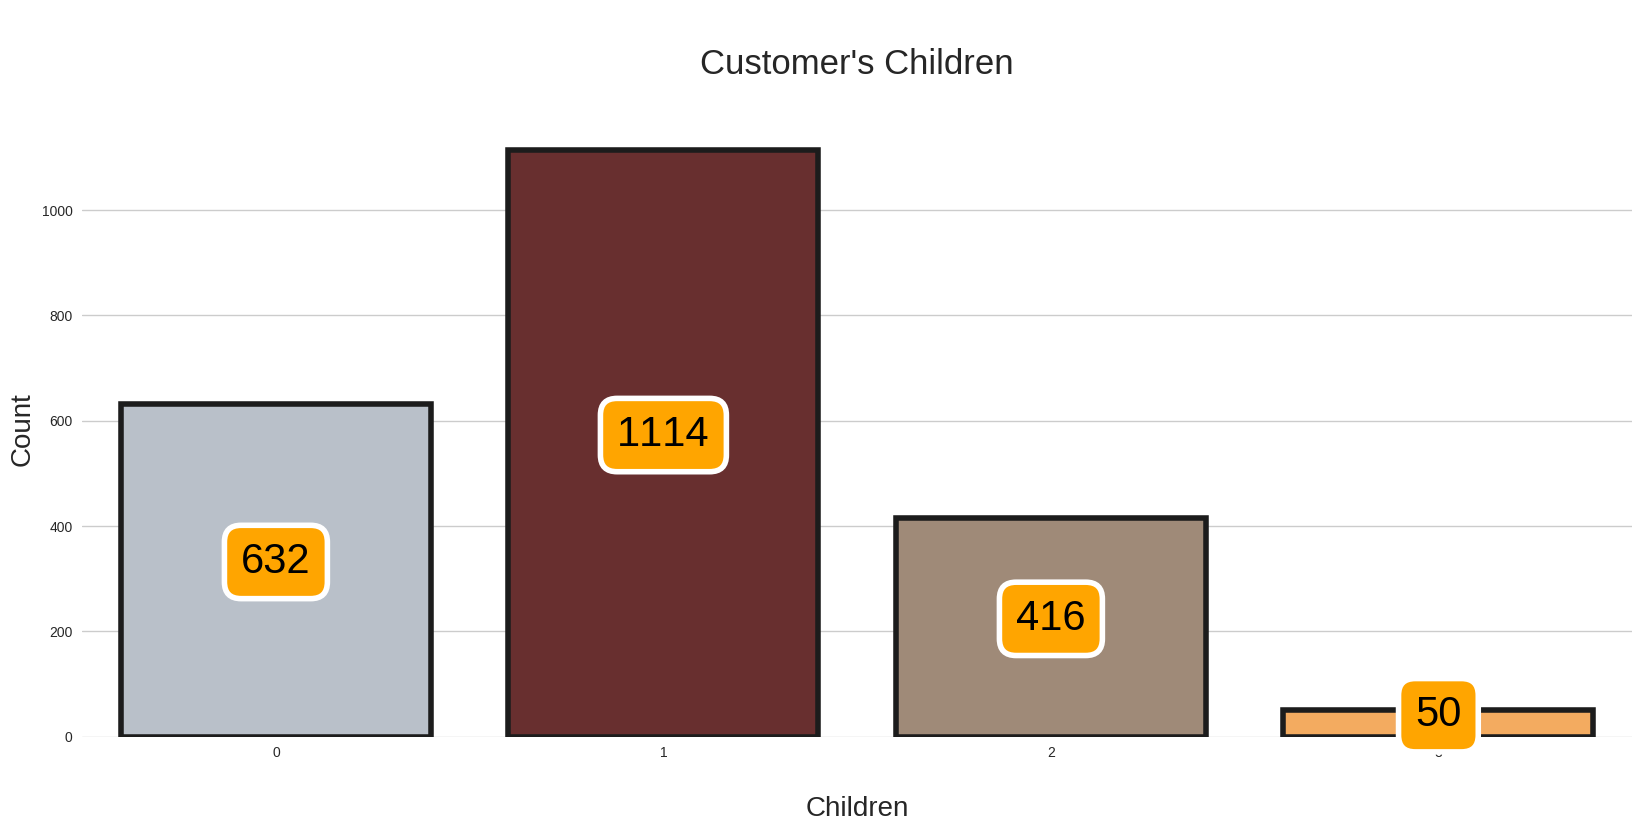

In [ ]:
print(f"Let's have a look on the distribution of customer's children :")
plt.subplots(figsize=(20, 8))
p = sns.countplot(x=data["Children"],palette=["#B9C0C9","#682F2F", "#9F8A78","#F3AB60"], saturation=1,edgecolor = "#1c1c1c", linewidth = 4)
p.axes.set_yscale("linear")
p.axes.set_title("\nCustomer's Children\n",fontsize=25)
p.axes.set_ylabel("Count",fontsize=20)
p.axes.set_xlabel("\nChildren",fontsize=20)
p.axes.set_xticklabels(p.get_xticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="center",padding=6,size=30,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "white", "linewidth" : 4, "alpha": 1})


sns.despine(left=True, bottom=True)
plt.show()

632 customers have no child.

Most of the customers have one child.

416 customers have two child.

50 customers have three child.

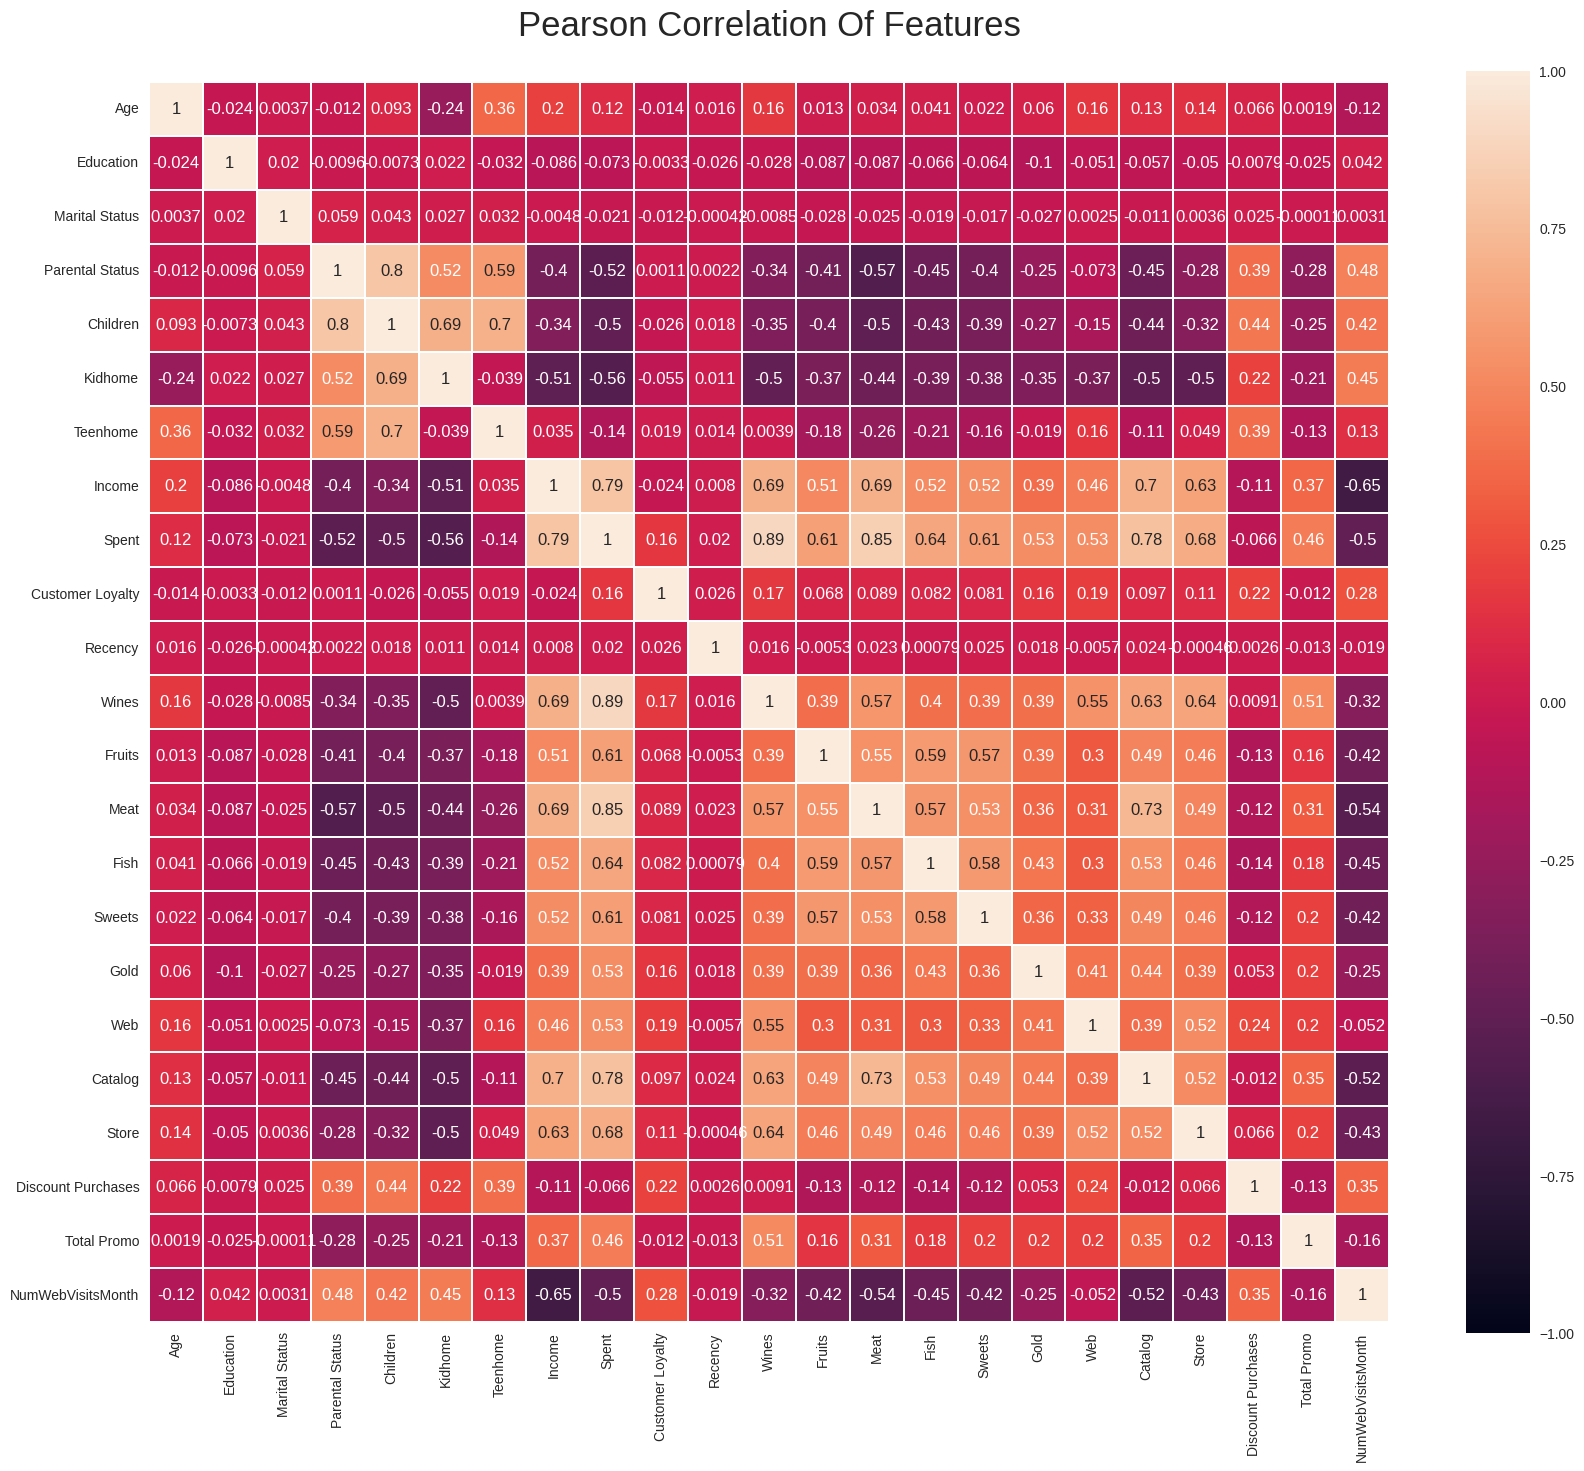

In [ ]:
catcol = ["Education","Marital Status"]
le = LabelEncoder()
for col in catcol:
        data[col] = le.fit_transform(data[col])


plt.subplots(figsize =(20, 20))

sns.heatmap(data.drop(columns="ID").corr(), square=True, cbar_kws=dict(shrink =.82),
            annot=True, vmin=-1, vmax=1, linewidths=0.1,linecolor='white',annot_kws=dict(fontsize =12))
plt.title("Pearson Correlation Of Features\n", fontsize=25)
plt.xticks(rotation=90)
plt.show()

High correlation between customer's income and spending. Also high correlation between buying wine, meat and buying through catalog and stores with income and spending.

High correlation between buying meat and buying through catalog.

In [ ]:
#data scaling
dataC = data.copy()
scaler = StandardScaler()
dataC = scaler.fit_transform(dataC)
scaled_data = pd.DataFrame(dataC, columns= data.columns)
print("After scaling, let's have a glimpse of the scaled dataset :")
scaled_data.head()

After scaling, let's have a glimpse of the scaled dataset :


ID       Age  Education  Marital Status  Parental Status  Children  \
0 -0.018837  1.018352  -0.893586       -1.349603        -1.581139 -1.264598   
1 -1.050626  1.274785  -0.893586       -1.349603         0.632456  1.404572   
2 -0.444797  0.334530  -0.893586        0.740959        -1.581139 -1.264598   
3  0.183824 -1.289547  -0.893586        0.740959         0.632456  0.069987   
4 -0.080437 -1.033114   0.571657        0.740959         0.632456  0.069987   

    Kidhome  Teenhome    Income     Spent  ...      Meat      Fish    Sweets  \
0 -0.822754 -0.929699  0.287105  1.676245  ...  1.690293  2.453472  1.483713   
1  1.040021  0.908097 -0.260882 -0.963297  ... -0.718230 -0.651004 -0.634019   
2 -0.822754 -0.929699  0.913196  0.280110  ... -0.178542  1.339513 -0.147184   
3  1.040021 -0.929699 -1.176114 -0.920135  ... -0.655787 -0.504911 -0.585335   
4  1.040021 -0.929699  0.294307 -0.307562  ... -0.218684  0.152508 -0.001133   

       Gold       Web   Catalog     Store  Discount Purchases  Total Promo  \
0  0.852576  1.426865  2.503607 -0.555814            0.351030     -0.43916   
1 -0.733642 -1.126420 -0.571340 -1.171160           -0.168701     -0.43916   
2 -0.037254  1.426865 -0.229679  1.290224           -0.688432     -0.43916   
3 -0.752987 -0.761665 -0.913000 -0.555814           -0.168701     -0.43916   
4 -0.559545  0.332600  0.111982  0.059532            1.390492     -0.43916   

   NumWebVisitsMonth  
0           0.692181  
1          -0.132545  
2          -0.544908  
3           0.279818  
4          -0.132545  

[5 rows x 24 columns]

In [ ]:
scaled_dataC = scaled_data.copy()
pca = PCA(n_components = 3,random_state = 42)
scaled_dataC = pca.fit_transform(scaled_dataC)
pca_data = pd.DataFrame(scaled_dataC, columns=["col1","col2", "col3"])

print("Let's have a glimpse of the PCA transformed dataset :")
pca_data.head(15)

Let's have a glimpse of the PCA transformed dataset :


col1      col2      col3
0   4.568310  0.162165  2.084677
1  -2.875395  0.219220 -2.006241
2   2.413477 -0.843289 -0.184249
3  -2.690235 -1.541448  0.168357
4  -0.613424 -0.046576  0.451250
5   0.564686  1.247157 -0.776980
6   0.494467  1.589400  0.863670
7  -2.432465 -0.902853  1.491573
8  -3.000794 -1.226579  0.964137
9  -4.822590  0.588506  0.739021
10 -1.769695 -2.576028  1.717557
11  3.778201 -1.924905 -0.760807
12 -1.836093  1.565116 -1.264763
13 -1.737553 -2.737951  1.905645
14  4.303172  0.204356 -0.094209

Elbow Method for determining the number of clusters :


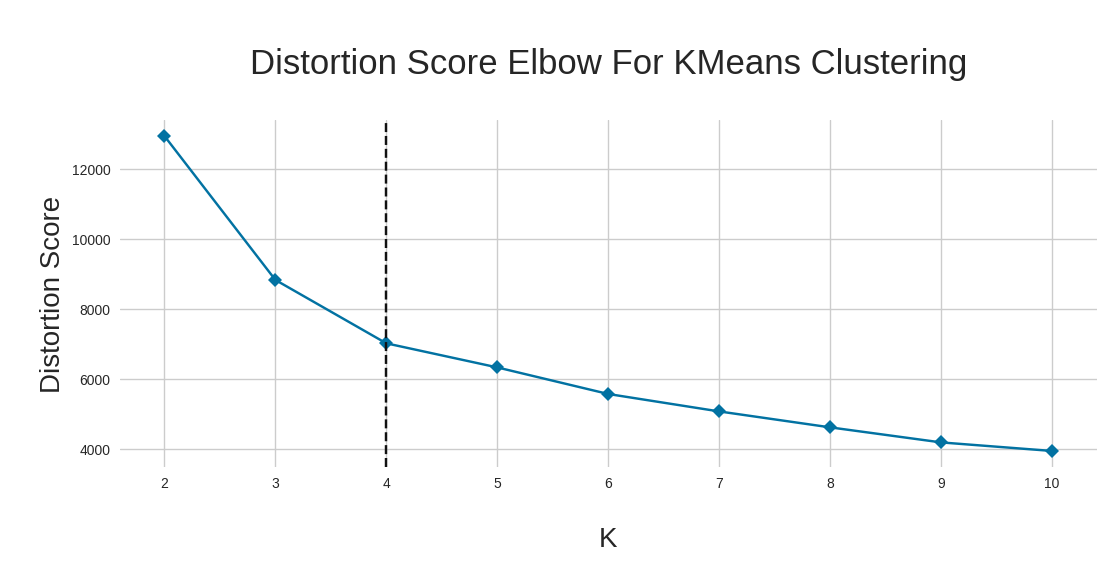

In [ ]:
print("Elbow Method for determining the number of clusters :")
_, axes = plt.subplots(figsize=(20,8))

elbow = KElbowVisualizer(KMeans(), k=10, timings=False, locate_elbow=True, size=(1260,450))
elbow.fit(pca_data)

axes.set_title("\nDistortion Score Elbow For KMeans Clustering\n",fontsize=25)
axes.set_xlabel("\nK",fontsize=20)
axes.set_ylabel("\nDistortion Score",fontsize=20)

sns.despine(left=True, bottom=True)
plt.show()

In [ ]:
km = KMeans(n_clusters = 4,random_state = 42)

y_km = km.fit_predict(pca_data)
pca_data["Clusters"] = y_km
data["Clusters"]= y_km

Let's have a look on the customers quantity distribution after clustering :


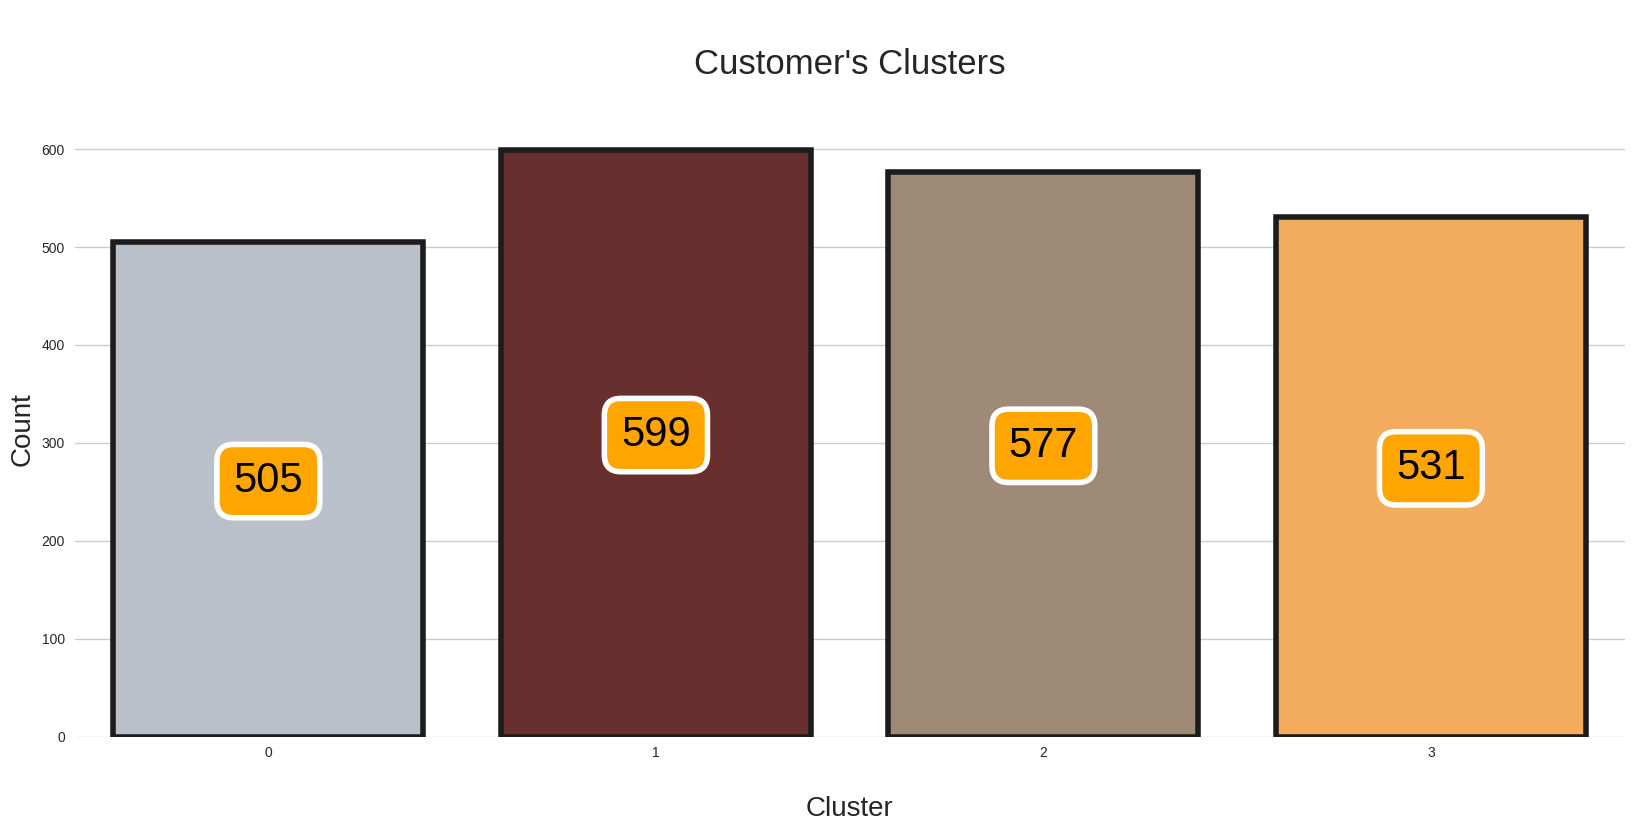

In [ ]:
print("Let's have a look on the customers quantity distribution after clustering :")

plt.subplots(figsize=(20, 8))
p = sns.countplot(x=data["Clusters"],palette=["#B9C0C9","#682F2F", "#9F8A78","#F3AB60"], saturation=1,edgecolor = "#1c1c1c", linewidth = 4)
p.axes.set_yscale("linear")
p.axes.set_title("\nCustomer's Clusters\n",fontsize=25)
p.axes.set_ylabel("Count",fontsize=20)
p.axes.set_xlabel("\nCluster",fontsize=20)
p.axes.set_xticklabels(p.get_xticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="center",padding=6,size=30,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "white", "linewidth" : 4, "alpha": 1})


sns.despine(left=True, bottom=True)
plt.show()

Let's have a look on the characteristics of the clusters on the basis of income and spending :


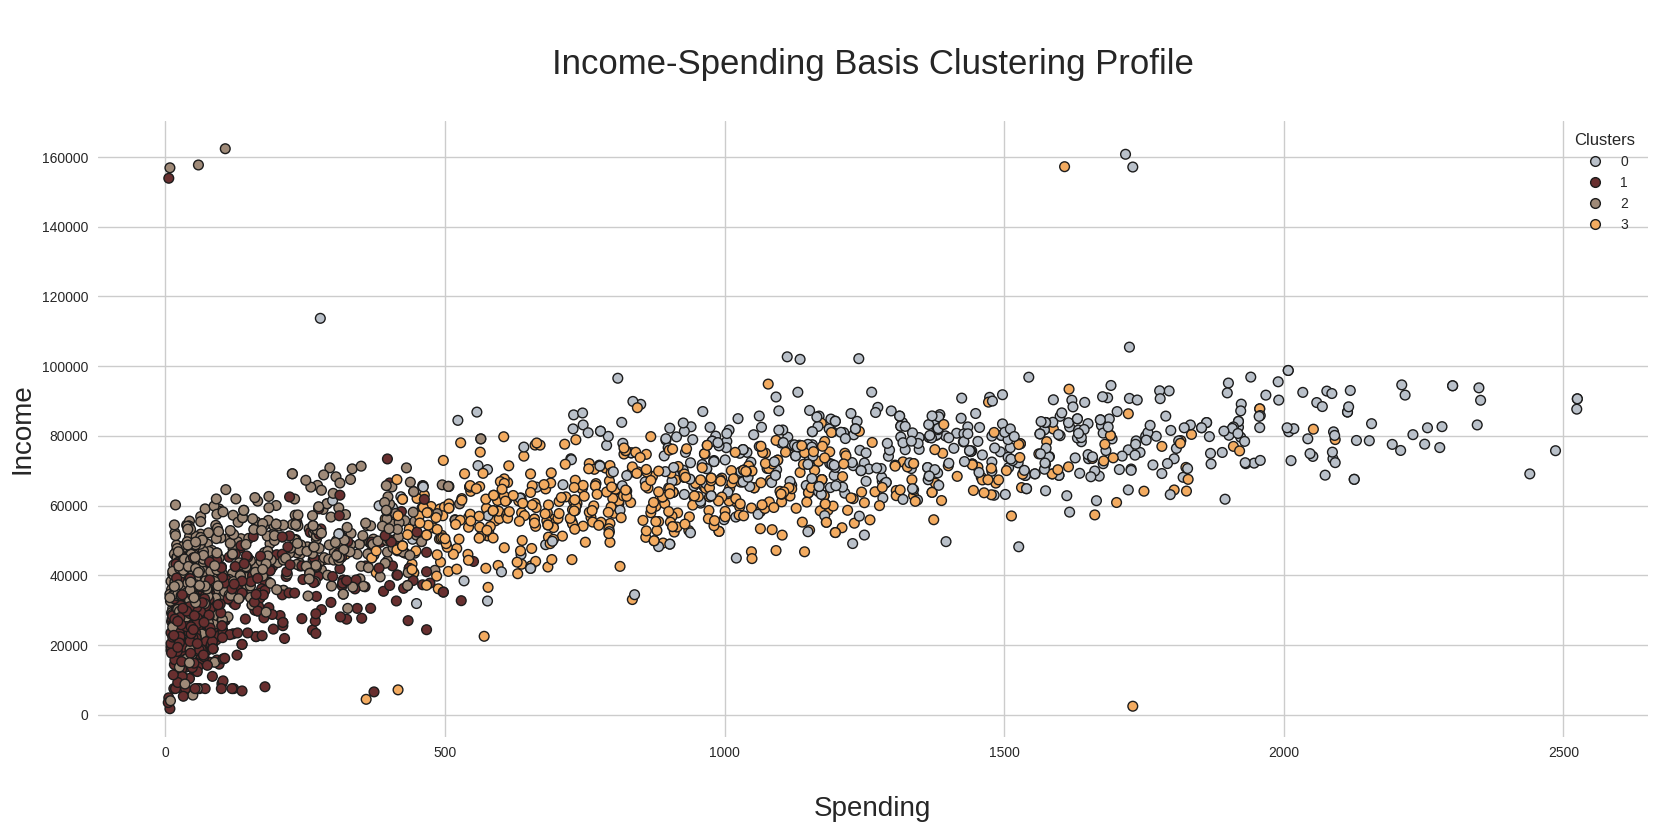

In [ ]:
print(f"Let's have a look on the characteristics of the clusters on the basis of income and spending :")

_, axes = plt.subplots(figsize=(20,8))
sns.scatterplot(x=data["Spent"],y=data["Income"],hue=data["Clusters"],palette=["#B9C0C9","#682F2F", "#9F8A78","#F3AB60"],sizes=60, alpha=1,edgecolor = "#1c1c1c", linewidth = 1)
axes.set_title("\nIncome-Spending Basis Clustering Profile\n",fontsize=25)
axes.set_ylabel("Income",fontsize=20)
axes.set_xlabel("\nSpending",fontsize=20)

sns.despine(left=True, bottom=True)
plt.show()

Most of the cluster 0 customers income range is in between 5000 to 40000 and spending range is in between 0 to 500.

Most of the cluster 1 customers income range is in between 65000 to 85000 and spending range is in between 550 to 2000.

Most of the cluster 2 customers income range is in between 50000 to 80000 and spending range is in between 250 to 1800.

Most of the cluster 3 customers income range is in between 40000 to 60000 and spending range is in between 0 to 500.

Let's have a look on the characteristics of the clusters on the basis of spending :


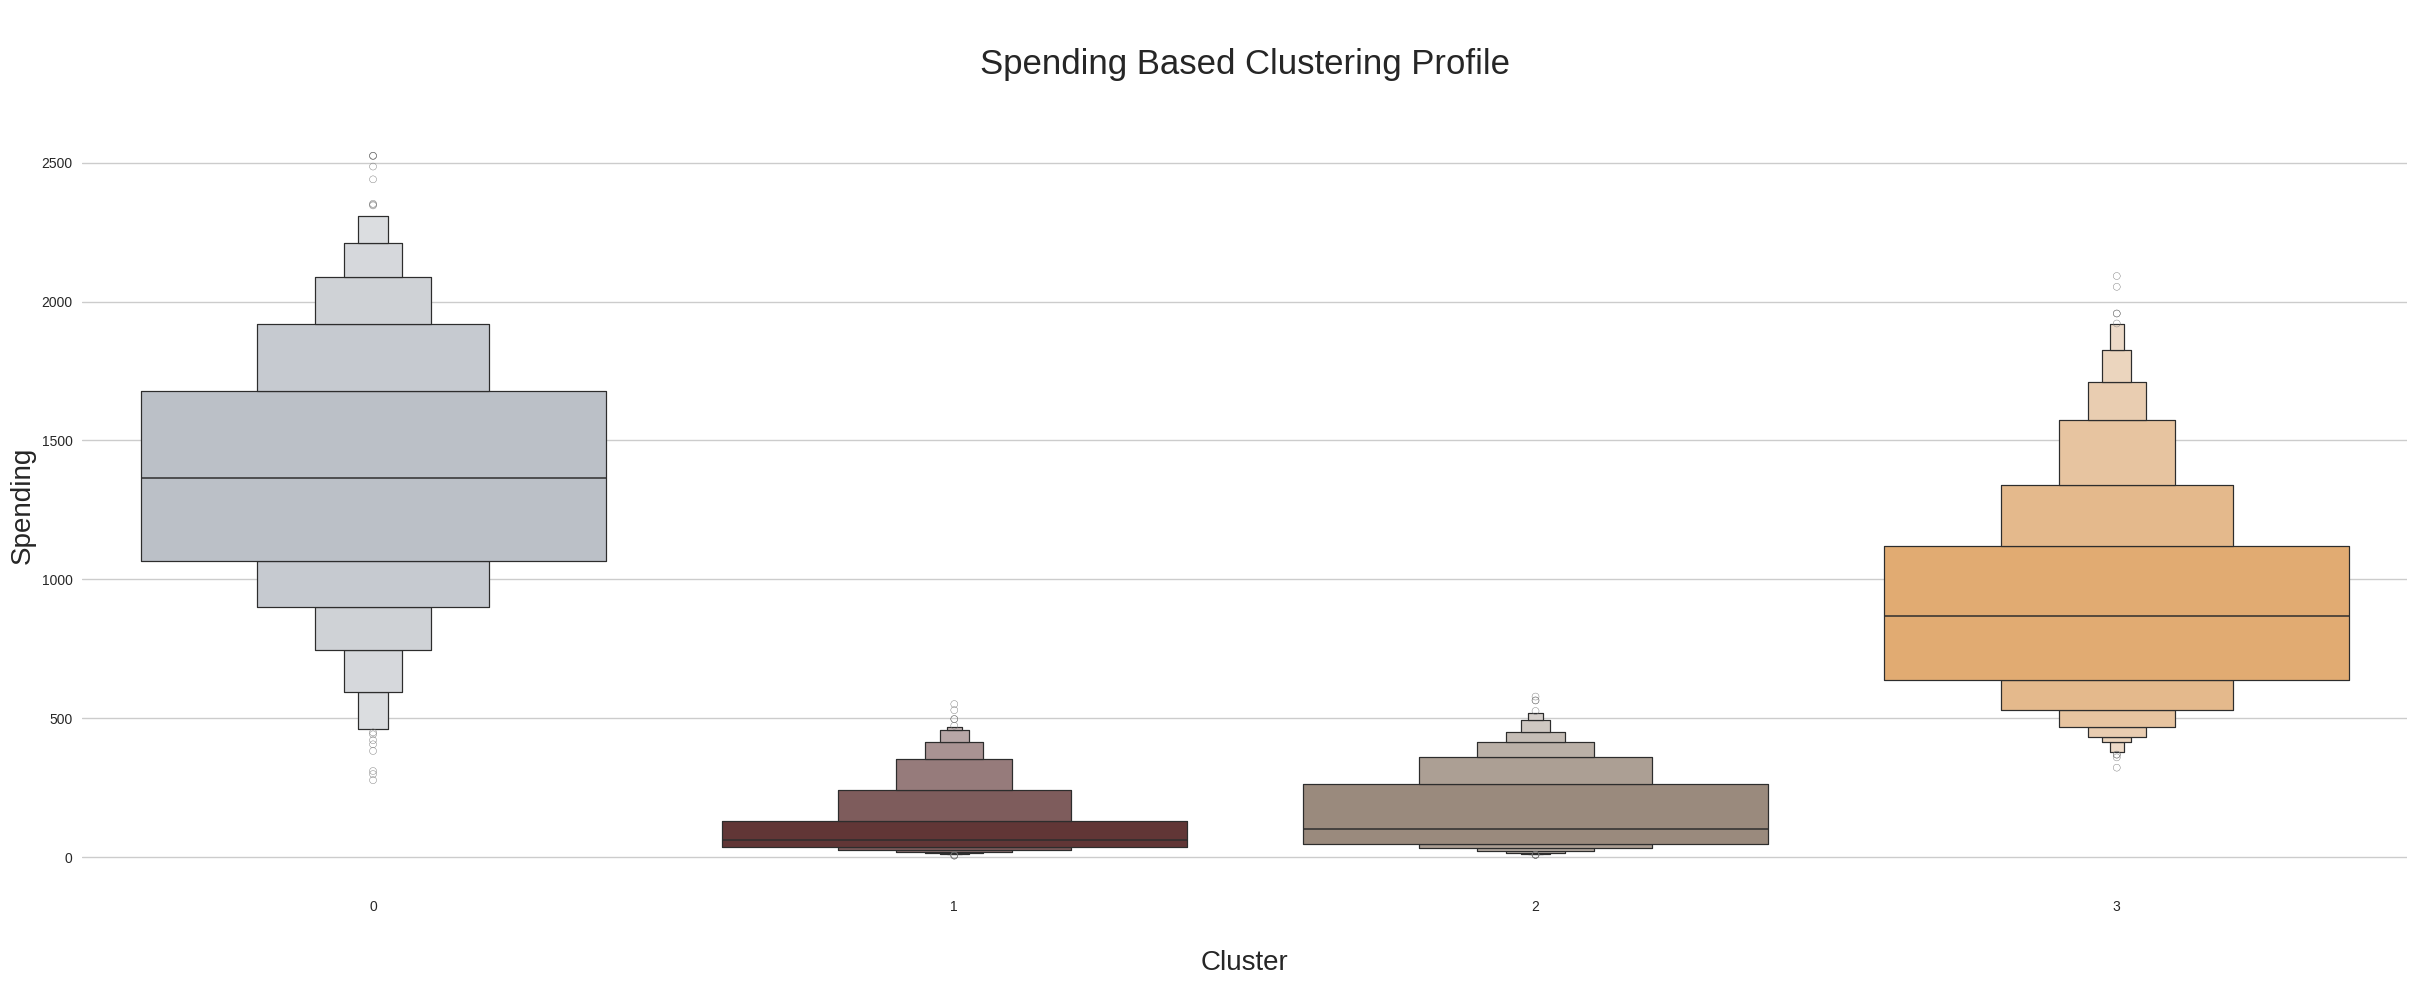

In [ ]:
print(f"Let's have a look on the characteristics of the clusters on the basis of spending :")

_, axes = plt.subplots(figsize=(30,10))
sns.boxenplot(x=data["Clusters"], y=data["Spent"], palette=["#B9C0C9","#682F2F", "#9F8A78","#F3AB60"])
# sns.swarmplot(x=data["Clusters"],y=data["Spent"],color="#B9C0C9",marker="o",size=10,alpha=0.6,linewidth=0,edgecolor="white")

axes.set_title("\nSpending Based Clustering Profile\n",fontsize=25)
axes.set_ylabel("Spending",fontsize=20)
axes.set_xlabel("\nCluster",fontsize=20)

sns.despine(left=True, bottom=True)
plt.show()

Most of the cluster 0 customers spending range is in between 0 to 500.

Most of the cluster 1 customers spending range is in between 550 to 2000.

Most of the cluster 2 customers spending range is in between 250 to 1800.

Most of the cluster 3 customers spending range is in between 0 to 500.

Let's have a look on the characteristics of the clusters on the basis of accepting promotions :


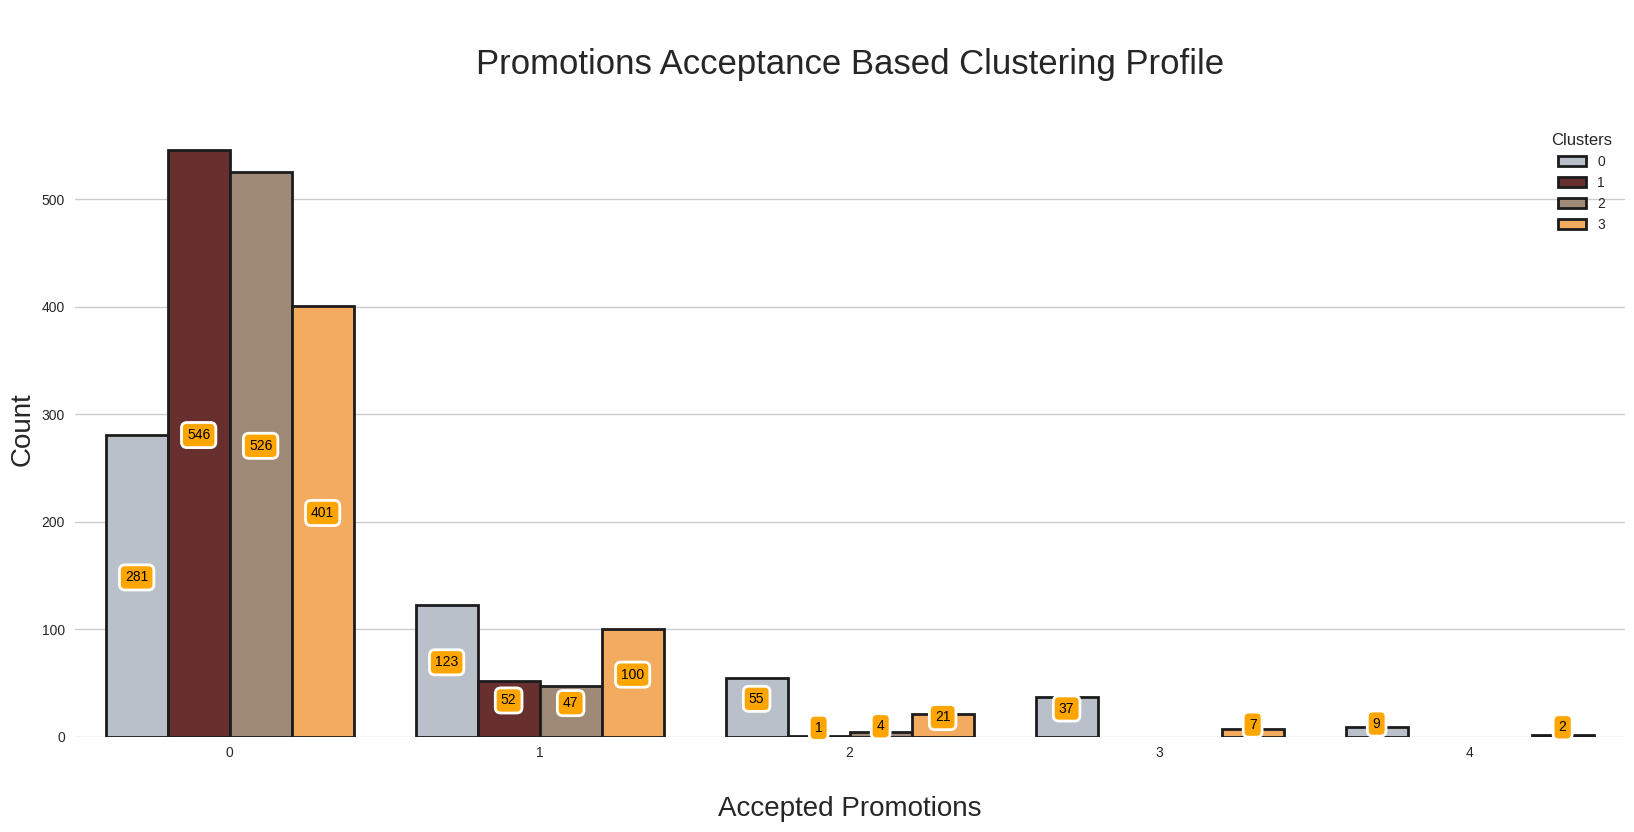

In [ ]:
print(f"Let's have a look on the characteristics of the clusters on the basis of accepting promotions :")

plt.subplots(figsize=(20, 8))
p = sns.countplot(x=data["Total Promo"],hue=data["Clusters"],palette=["#B9C0C9","#682F2F", "#9F8A78","#F3AB60"], saturation=1,edgecolor = "#1c1c1c", linewidth = 2)
p.axes.set_yscale("linear")
p.axes.set_title("\nPromotions Acceptance Based Clustering Profile\n",fontsize=25)
p.axes.set_ylabel("Count",fontsize=20)
p.axes.set_xlabel("\nAccepted Promotions",fontsize=20)
p.axes.set_xticklabels(p.get_xticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="center",padding=6,size=10,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "white", "linewidth" : 2, "alpha": 1})


sns.despine(left=True, bottom=True)
plt.show()

546 customers of cluster 0, 283 customers of cluster 1, 410 customers of cluster 2 and 515 customers of cluster 3 have not accepted any promotions yet.

52 customers of cluster 0, 123 customers of cluster 1, 100 customers of cluster 2 and 47 customers of cluster 3 have accepted only one promotions yet.

1 customer of cluster 0, 55 customers of cluster 1, 21 customers of cluster 2 and 4 customers of cluster 3 have accepted two promotions.

Only 37 customers of cluster 1 and 7 customers of cluster 2 have accepted three promotions.

Only 11 customers of cluster 1 have accepted Four promotions.


Let's have a look on the characteristics of the clusters on the basis of discount purchases :


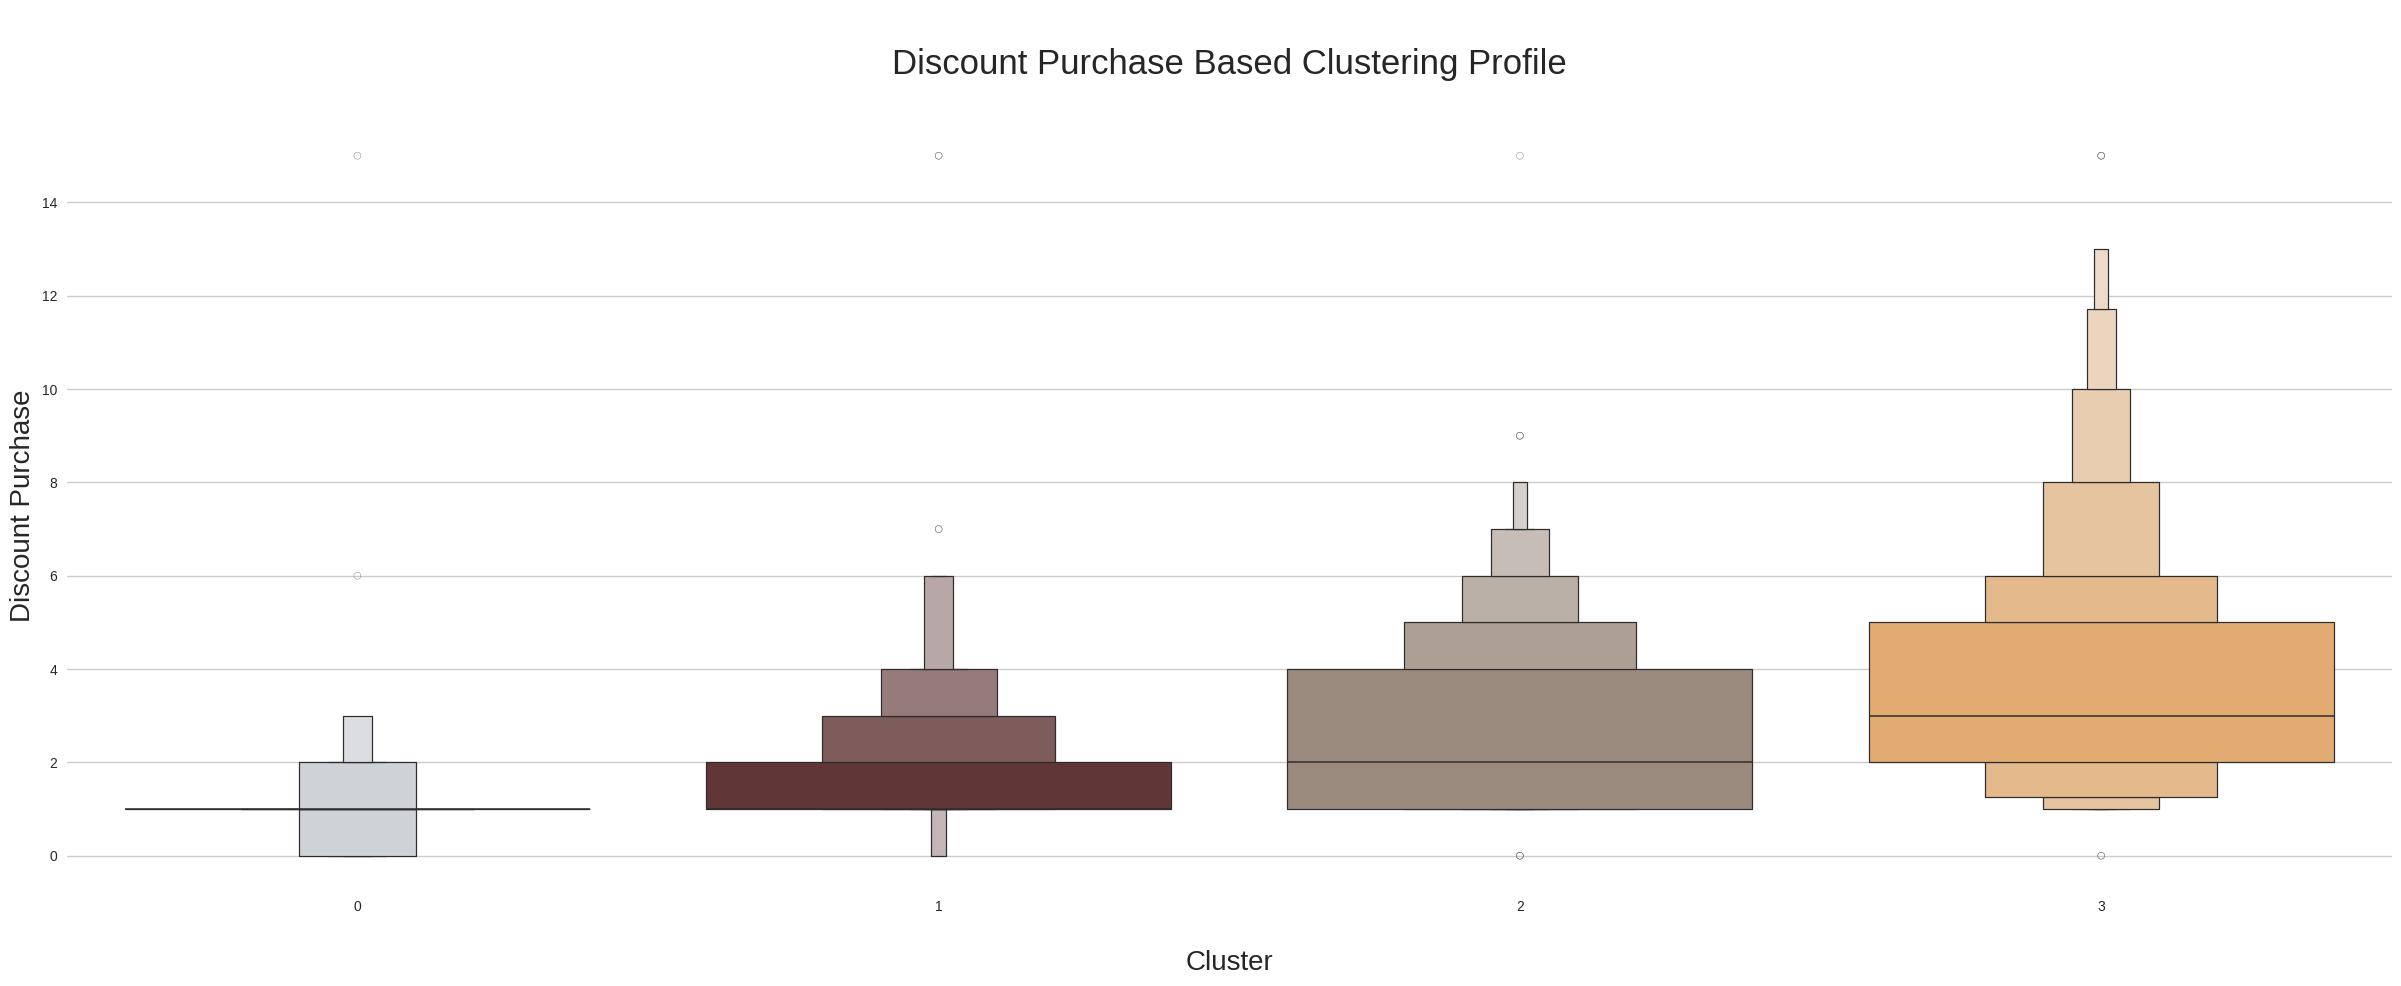

In [ ]:
print(f"Let's have a look on the characteristics of the clusters on the basis of discount purchases :")

_, axes = plt.subplots(figsize=(30,10))
sns.boxenplot(x=data["Clusters"], y=data["Discount Purchases"], palette=["#B9C0C9","#682F2F", "#9F8A78","#F3AB60"])

axes.set_title("\nDiscount Purchase Based Clustering Profile\n",fontsize=25)
axes.set_ylabel("Discount Purchase",fontsize=20)
axes.set_xlabel("\nCluster",fontsize=20)

sns.despine(left=True, bottom=True)
plt.show()

Most of the customers of cluster 0 have completed purchases using discount either 1/2 times.

Most of the customers of cluster 1 have completed purchases using discount only one times.

Most of the customers of cluster 2 have completed purchases using discount 2 to 5 times.

Most of the customers of cluster 3 have completed purchases using discount 1 to 4 times.

In [ ]:
def cluster(feature):

    _, axes = plt.subplots(figsize=(16,8))
    sns.kdeplot(x=data[feature], y=data["Spent"], hue =data["Clusters"], kind="kde",height=10, palette=["#B9C0C9","#682F2F", "#9F8A78","#F3AB60"])
    axes.set_title(f"\nClustering Profile On {feature}\n",fontsize=25)
    axes.set_ylabel("Spending",fontsize=20)
    axes.set_xlabel(f"\n{feature}",fontsize=20)

    sns.despine(left=True, bottom=True)
    plt.show()

Characteristics of clusters based on spending and having childern :


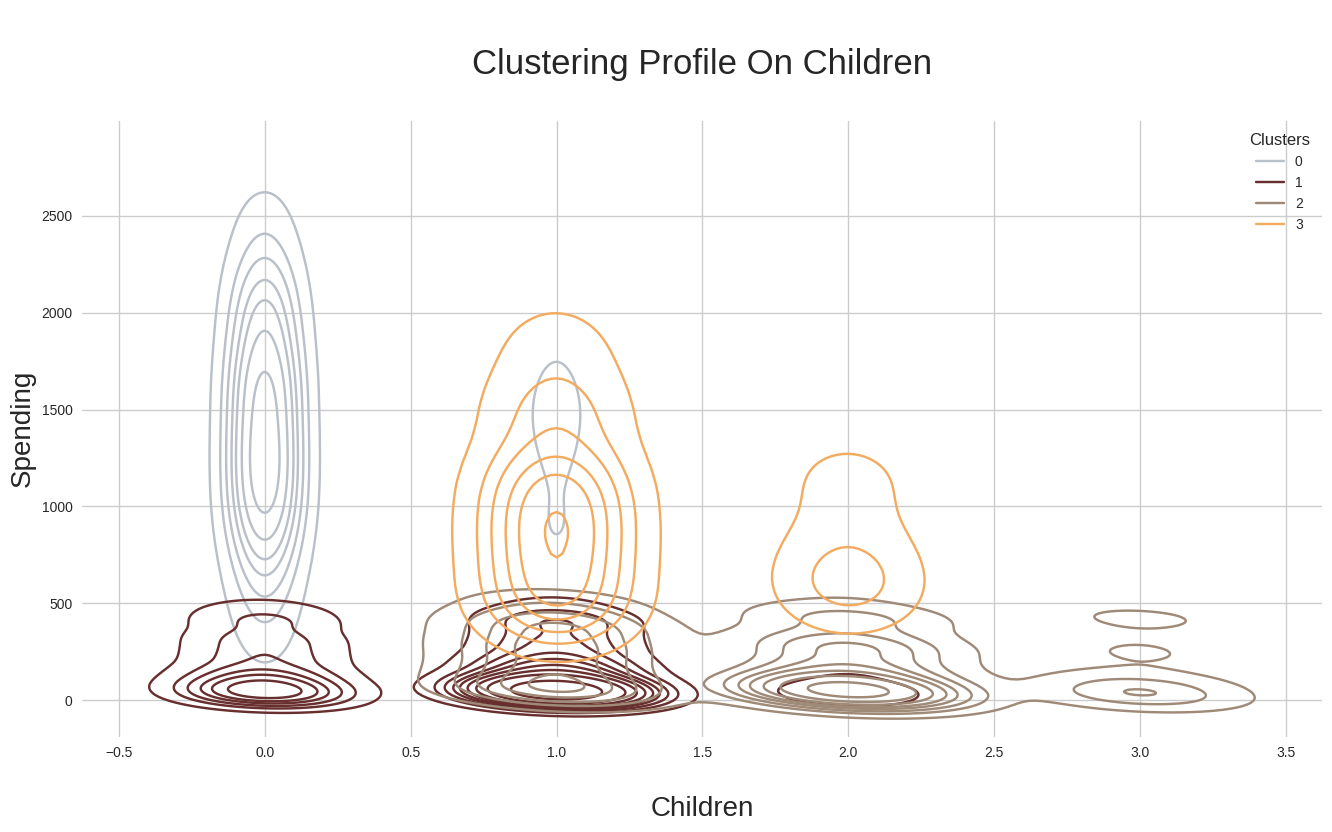

In [ ]:
print(f"Characteristics of clusters based on spending and having childern :")
cluster("Children")

Customers of cluster 0 either have one child or don't have any. Their spending range is in between 0 to 500.

Most of the customers of cluster 1 don't have any child, only a few have one. Their spending range is in between 550 to 2000.

Most of the customers of cluster 2 have one child, some have two. Their spending range is in between 250 to 1800.

Most of the customers of cluster 3 have two child, some have one and very few have three. Their spending range is in between 0 to 500.

Characteristics of clusters based on spending and age :


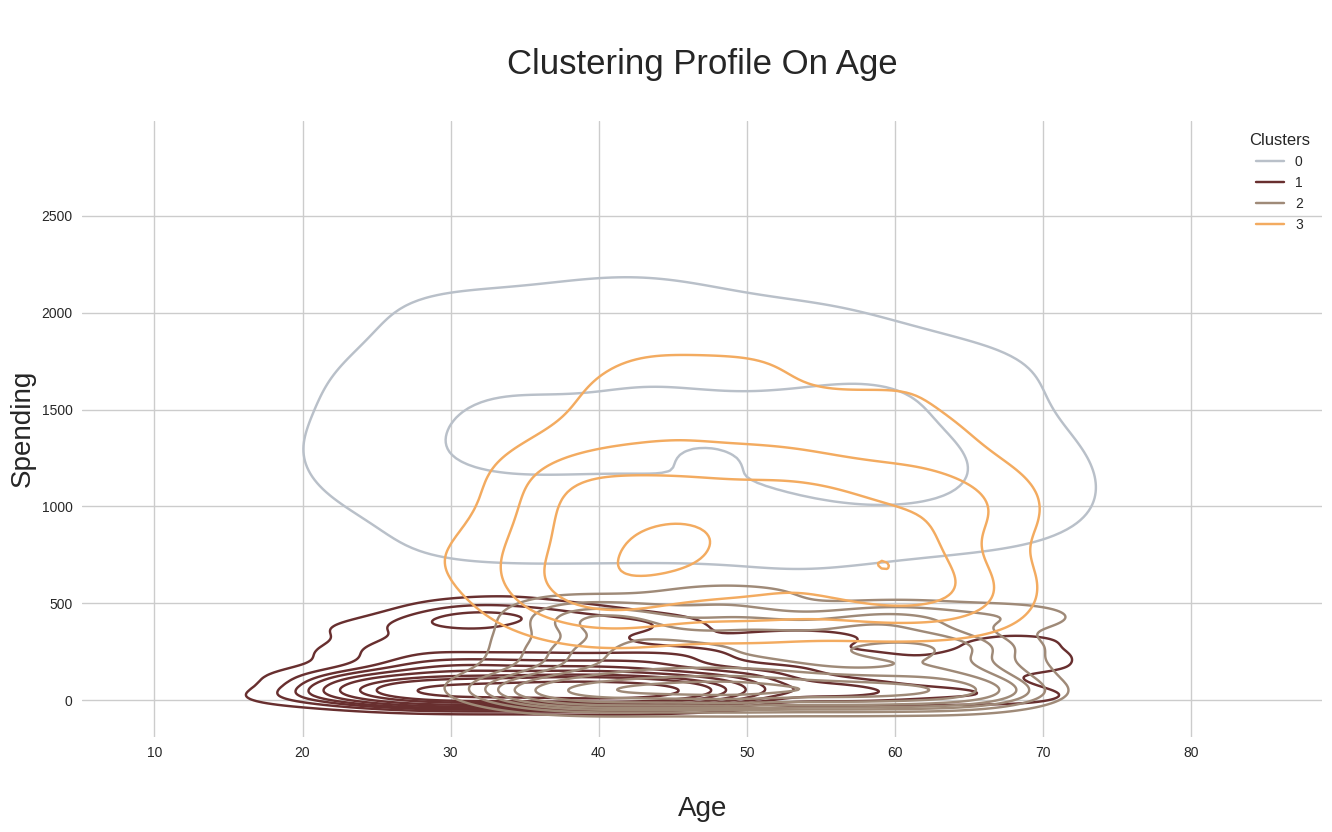

In [ ]:
print(f"Characteristics of clusters based on spending and age :")
cluster("Age")

Most of the customers of cluster 0 have age range in between 25 to 50. Their spending range is in between 0 to 500.

Most of the customers of cluster 1 have age range in between 30 to 60. Their spending range is in between 550 to 2000.

Most of the customers of cluster 2 have age range in between 35 to 60. Their spending range is in between 250 to 1800.

Most of the customers of cluster 3 have age range in between 40 to 65. Their spending range is in between 0 to 500.

Characteristics of clusters based on spending and education level :


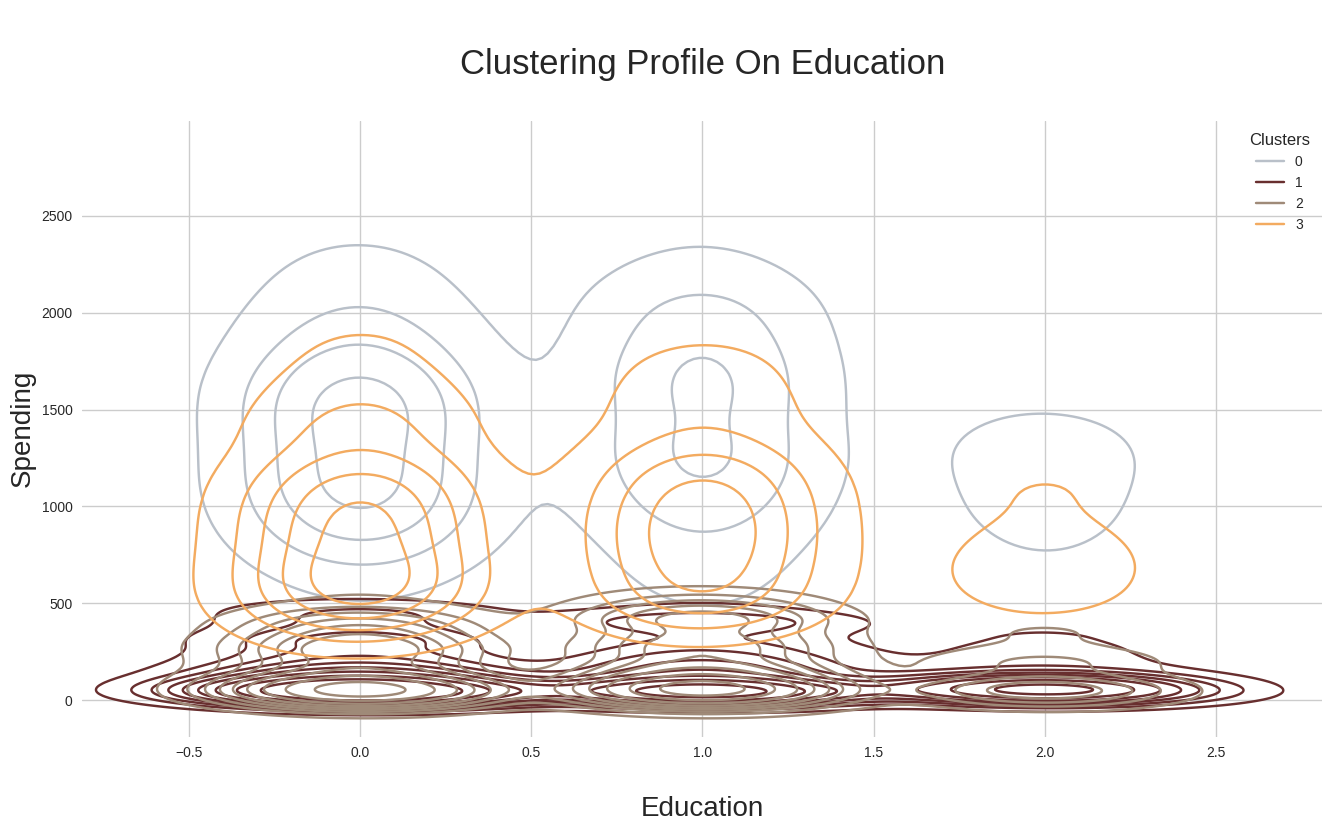

In [ ]:
print(f"Characteristics of clusters based on spending and education level :")
cluster("Education")

The customers of cluster 0 are graduate or in postgraduate level or in undergraduate level. Their spending range is in between 0 to 500.

Most of the customers of cluster 1 are graduate or in postgraduate level. Their spending range is in between 550 to 2000.

Most of the customers of cluster 2 are graduate and very few in postgraduate level. Their spending range is in between 250 to 1800.

All the customers of cluster 3 are graduate or in postgraduate level and some are in undergraduate level. Their spending range is in between 0 to 500.

Characteristics of clusters based on spending and marital status :


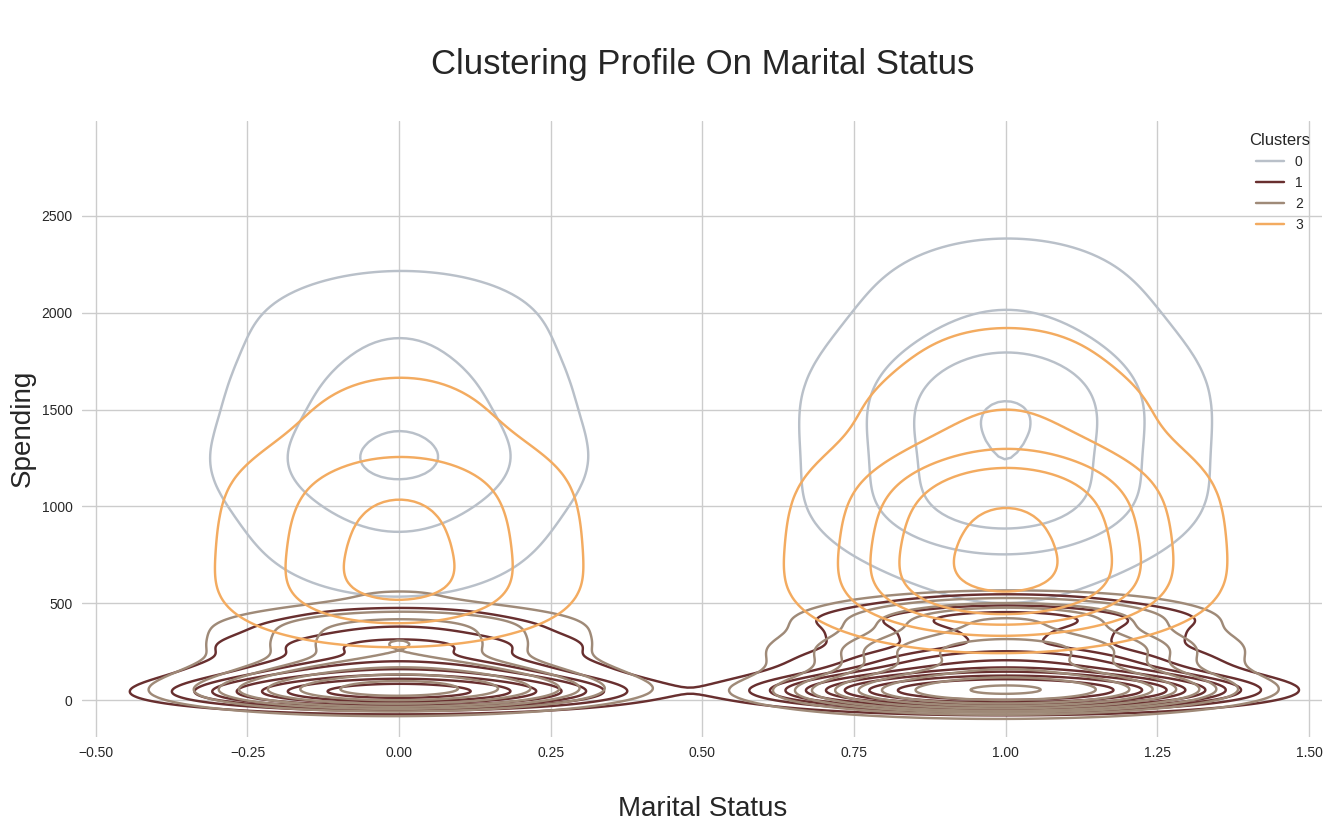

In [ ]:
print(f"Characteristics of clusters based on spending and marital status :")
cluster("Marital Status")

Most of the customers of cluster 0 are married and very few are unmarried. Their spending range is in between 0 to 500.

Most of the customers of cluster 1 are married. Their spending range is in between 550 to 2000.

Most of the customers of cluster 2 are married. Their spending range is in between 250 to 1800.

Some customers of cluster 3 are married and some are unmarried. Their spending range is in between 0 to 500.

Characteristics of clusters based on spending and parental status :


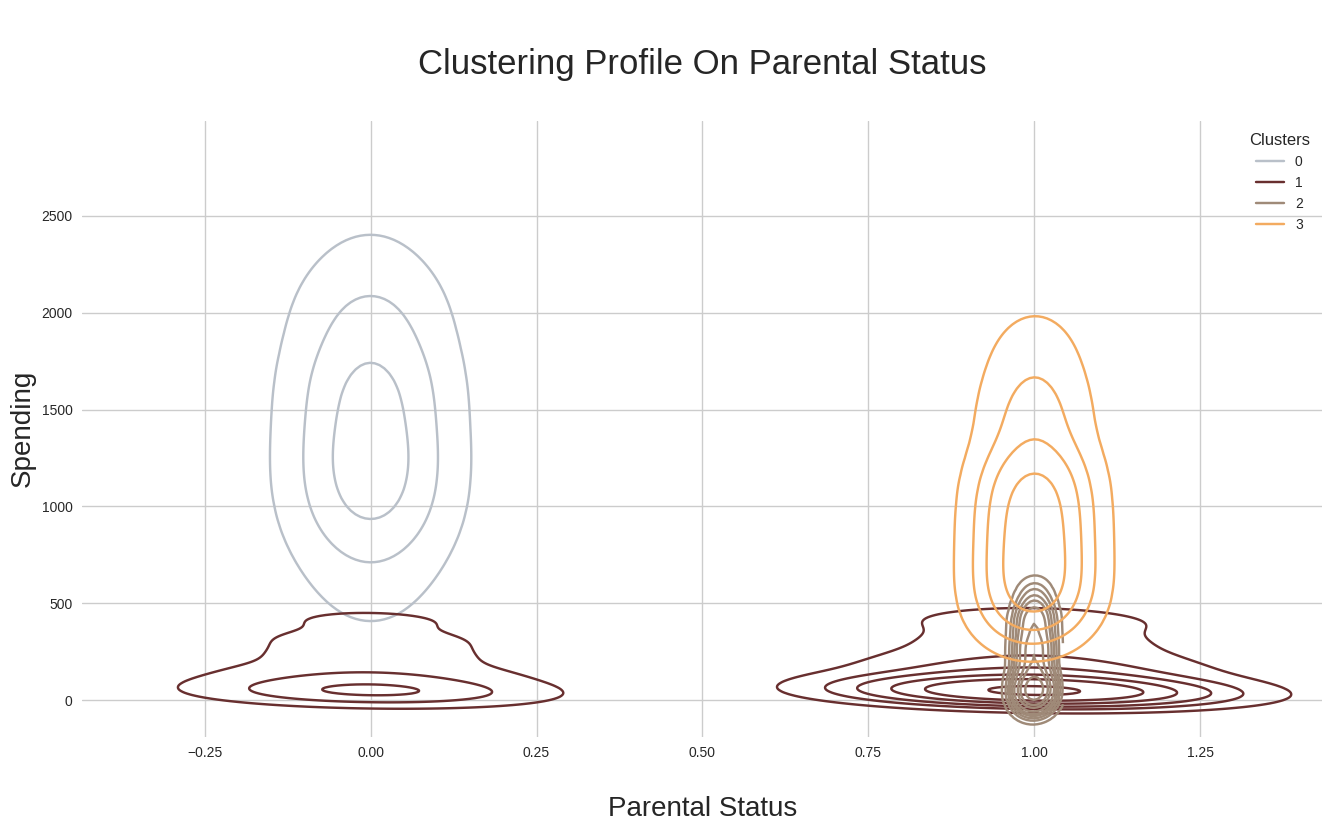

In [ ]:
print(f"Characteristics of clusters based on spending and parental status :")
cluster("Parental Status")

Most of the customers of cluster 0 are parents and very few are not parents. Their spending range is in between 0 to 500.

All the customers of cluster 1 are not parents. Their spending range is in between 550 to 2000.

All the customers of cluster 2 are parents. Their spending range is in between 250 to 1800.

All the customers of cluster 3 are parents. Their spending range is in between 0 to 500.

Characteristics of clusters based on spending and customer loyalty :


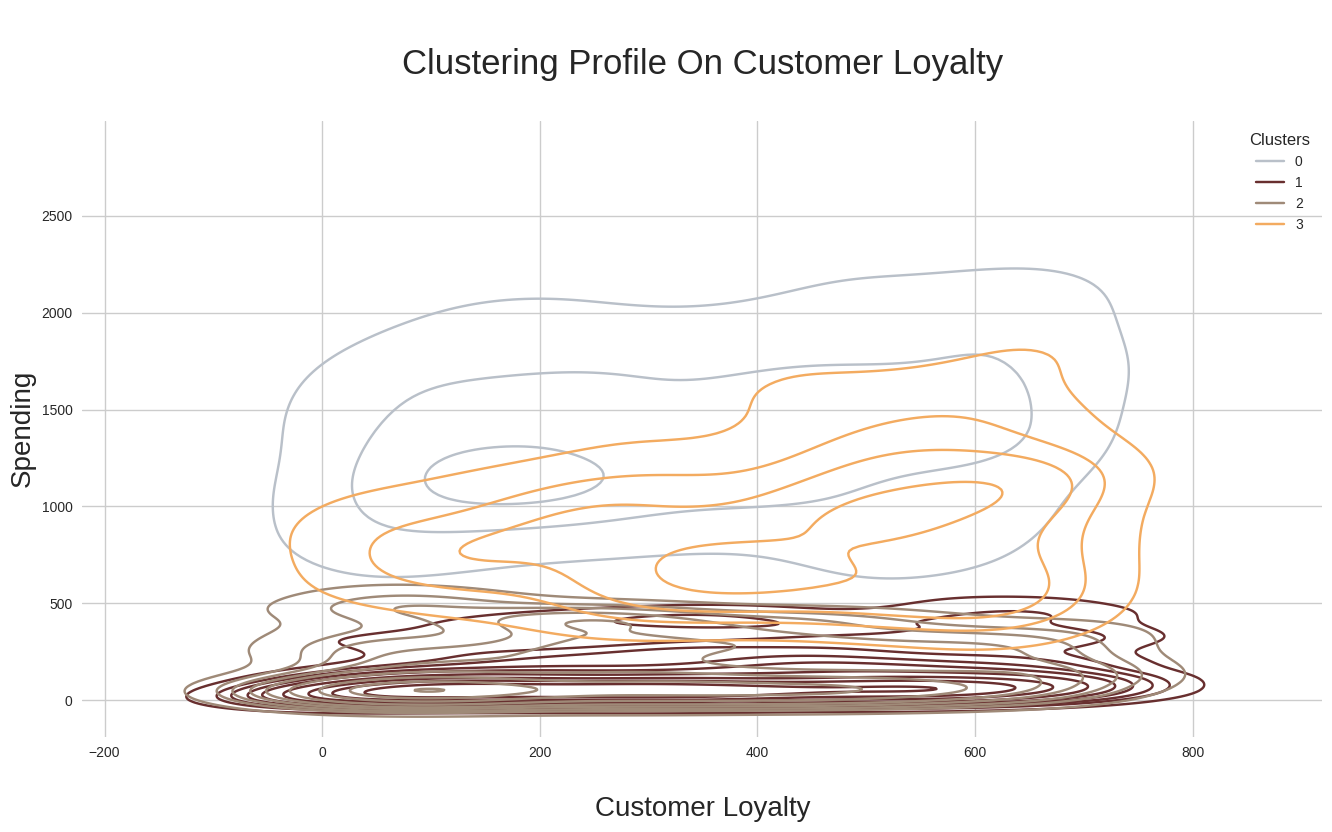

In [ ]:
print(f"Characteristics of clusters based on spending and customer loyalty :")
cluster("Customer Loyalty")

Most of the customers of cluster 0 are customer for 300 to 900 days. Their spending range is in between 0 to 500.

Most of the customers of cluster 1 are customer for 250 to 750 days. Their spending range is in between 550 to 2000.

Most of the customers of cluster 2 are customer for 400 to 800 days. Their spending range is in between 250 to 1800.

Most of the customers of cluster 3 are customer for 150 to 650 days. Their spending range is in between 0 to 500.